<a href="https://colab.research.google.com/github/RogerOliveiraRS/Telecom-X/blob/main/Data_ScienceChallenge_Telecom_Roger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração dos Dados

In [54]:
import pandas as pd

In [55]:
dados = pd.read_json('/content/TelecomX_Data.json')

In [56]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Informações dos dados brutos

In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Normalização dos dados brutos json

In [58]:

import json

with open('/content/TelecomX_Data.json', 'r') as f:
    dados_brutos = json.load(f)

df = pd.json_normalize(dados_brutos, sep='_')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

## Visualização do Dataframe com suas respectivas colunas e linhas

In [59]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Dicionário

In [60]:
# customerID: número de identificação único de cada cliente
# Churn: se o cliente deixou ou não a empresa
# gender: gênero (masculino e feminino)
# SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# Partner: se o cliente possui ou não um parceiro ou parceira
# Dependents: se o cliente possui ou não dependentes
# tenure: meses de contrato do cliente
# PhoneService: assinatura de serviço telefônico
# MultipleLines: assisnatura de mais de uma linha de telefone
# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de segurança online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de proteção no dispositivo
# TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes
# Contract: tipo de contrato
# PaperlessBilling: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviços do cliente por mês
# Charges.Total: total gasto pelo cliente

# Começando a tratar os dados:

Identificar e Remover Valores Nulos:

In [61]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


 Lidar com Dados Duplicados:

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.drop_duplicates(inplace=True)


In [64]:
duplicate_rows = df.duplicated()


In [65]:
print("Duplicate Rows:")
print(df[duplicate_rows])


Duplicate Rows:
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet_StreamingTV, internet_StreamingMovies, account_Contract, account_PaperlessBilling, account_PaymentMethod, account_Charges_Monthly, account_Charges_Total]
Index: []

[0 rows x 21 columns]


Verificando os tipos de dados nas colunas

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Verificando se há elementos NaN:

In [67]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


verificando as 5 primeiras linhas do Dataframe

In [68]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


A coluna 'customerID', que não é significativa ao propósito desta análise foi retirada e código abaixo virou comentário.

In [69]:
# df.drop(columns=['customerID'], inplace=True)

Removendo linhas com qualquer valor nulo

In [70]:

df = df.dropna().copy()

print("\nValores nulos após remover linhas com NaN:")
print(df.isnull().sum())


Valores nulos após remover linhas com NaN:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


# Verificando o conteúdo das colunas

In [71]:
genero = df['customer_gender'].unique()
print(genero)

['Female' 'Male']


In [72]:
tipo_conexao = df['internet_InternetService'].unique()
print(tipo_conexao)

['DSL' 'Fiber optic' 'No']


In [73]:
tipo_contrato = df['account_Contract'].unique()
print(tipo_contrato)

['One year' 'Month-to-month' 'Two year']


In [74]:
tipo_pagamento = df['account_PaymentMethod'].unique()
print(tipo_pagamento)

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#Strings com elementos de caráter booleano ou binário

In [75]:

# Churn: se o cliente deixou ou não a empresa,                'yes'    'no'
# gender: gênero (masculino e feminino),                   'Male'  'Female'
# Partner:possui ou não um parceiro ou parceira               'yes'    'no'
# Dependents: possui ou não dependentes                       'yes'    'no'
# PhoneService: assinatura de serviço telefônico              'yes'    'no'
# MultipleLines: assisnatura de mais de uma linha de telefone 'yes'    'no'
# InternetService: assinatura de um provedor internet         'yes'    'no'
# OnlineSecurity: assinatura adicional de segurança online    'yes'    'no'
# OnlineBackup: assinatura adicional de backup online         'yes'    'no'
# DeviceProtection: assinatura adicional protec no disposit   'yes'    'no'
# TechSupport: assinatura adic suporte téc, menos  espera     'yes'    'no'
# StreamingTV: assinatura de TV a cabo                        'yes'   'no'
# StreamingMovies: assinatura de streaming de filmes          'yes'    'no'
# PaperlessBilling: se prefere receber online a fatura        'yes'    'no'



# Desistência por Tipo de Contrato

df.groupby(['account_Contract', 'Churn']): Agrupa o DataFrame com base nos valores das colunas 'account_Contract' e 'Churn'. Isso cria grupos para cada combinação única de tipo de contrato e status de churn.
.size(): Conta o número de linhas em cada um desses grupos. O resultado é uma Series com um índice multinível (account_Contract, Churn) e os valores são as contagens.
.unstack(fill_value=0): Transforma a Series resultante em um DataFrame, movendo o nível 'Churn' do índice para as colunas. fill_value=0 garante que as combinações onde não houve churn (ou onde não houve clientes) apareçam com o valor 0 em vez de NaN.

In [76]:
import pandas as pd

churn_por_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)
churn_por_contrato_selecionado = churn_por_contrato[['No', 'Yes']]

print(churn_por_contrato_selecionado)

Churn               No   Yes
account_Contract            
Month-to-month    2220  1655
One year          1307   166
Two year          1647    48


In [77]:
import pandas as pd
import numpy as np


churn_por_contrato['Total'] = churn_por_contrato['No'] + churn_por_contrato['Yes']

churn_por_contrato_percentual = churn_por_contrato.div(churn_por_contrato['Total'], axis=0) * 100

churn_por_contrato_percentual = churn_por_contrato_percentual[['No', 'Yes']]

churn_por_contrato_percentual_formatado = churn_por_contrato_percentual.map(lambda x: f'{x:.2f}%')

print("Percentual de Desistência por Tipo de Contrato:")
print(' ')
print(churn_por_contrato_percentual_formatado)

Percentual de Desistência por Tipo de Contrato:
 
Churn                 No     Yes
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


# Gráficos de pizza. Desistências por tipos de Contratos

In [78]:
import pandas as pd
import numpy as np


churn_por_contrato['Total'] = churn_por_contrato['No'] + churn_por_contrato['Yes']

churn_por_contrato_percentual = churn_por_contrato.div(churn_por_contrato['Total'], axis=0) * 100

churn_por_contrato_percentual = churn_por_contrato_percentual[['No', 'Yes']]

churn_por_contrato_percentual_formatado = churn_por_contrato_percentual.map(lambda x: f'{x:.2f}%')

print("Percentual de Desistência por Tipo de Contrato:")
print(' ')
print(churn_por_contrato_percentual_formatado)

Percentual de Desistência por Tipo de Contrato:
 
Churn                 No     Yes
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


# Gráfico de Pizza Distribuição de Clientes Desistentes por Tipo de Contrato

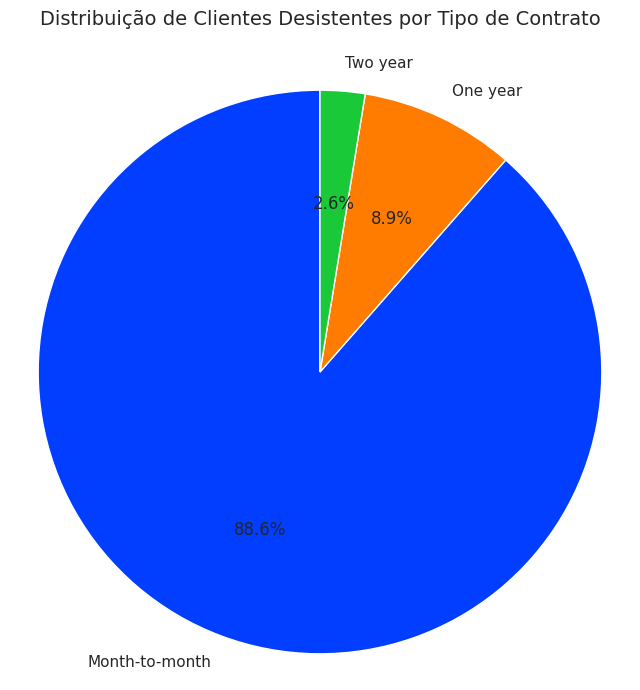

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


df_churn_yes = df[df['Churn'] == 'Yes'].copy()

churn_por_contrato_yes = df_churn_yes['account_Contract'].value_counts()

total_churn = churn_por_contrato_yes.sum()

churn_percentual_por_contrato = (churn_por_contrato_yes / total_churn) * 100

# Prepara os dados para o gráfico de pizza
sizes = churn_percentual_por_contrato.values
labels = churn_percentual_por_contrato.index
colors = sns.color_palette('bright')[0:len(labels)] # Cores para as fatias

# Cria a figura e o eixo para o gráfico
fig1, ax1 = plt.subplots(figsize=(8, 8))

# Plota o gráfico de pizza
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)

# Define o título do gráfico, ajustando a posição vertical com 'y'
ax1.set_title('Distribuição de Clientes Desistentes por Tipo de Contrato', fontsize=14, y=1.05) # Ajustado y para 1.05

# Garante que o gráfico seja um círculo
ax1.axis('equal')


plt.show()

O gráfico sugere um grande indice de desistência nos contratos mês a mês.


# Desistência por Gênero:

In [80]:
import pandas as pd

churn_por_genero = df.groupby(['customer_gender', 'Churn']).size().unstack(fill_value=0)


churn_por_genero_selecionado = churn_por_genero[['No', 'Yes']]

print(churn_por_genero_selecionado)

Churn              No  Yes
customer_gender           
Female           2549  939
Male             2625  930


# Gráfico de Pizza Desistência por Gênero

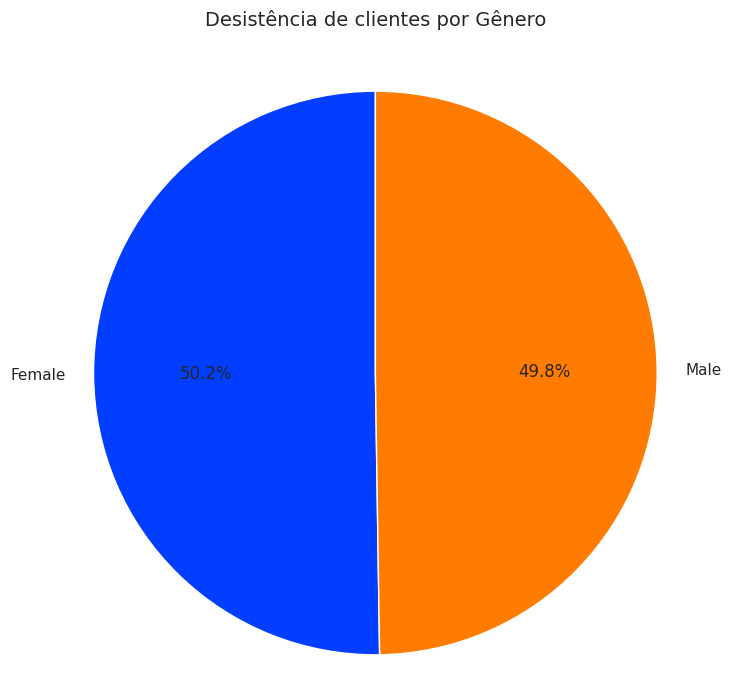

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")


df_churn_yes = df[df['Churn'] == 'Yes'].copy()


churn_por_genero_yes = df_churn_yes['customer_gender'].value_counts()

total_churn = churn_por_genero_yes.sum()


churn_percentual_por_genero = (churn_por_genero_yes / total_churn) * 100

sizes = churn_percentual_por_genero.values
labels = churn_percentual_por_genero.index
colors = sns.color_palette('bright')[0:len(labels)]


fig1, ax1 = plt.subplots(figsize=(8, 8))


ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)


ax1.set_title('Desistência de clientes por Gênero', fontsize=14, y=1.05)


ax1.axis('equal')


plt.show()

Resultado aponta para uma equidade nas desistências por gênero

Dicionário

In [82]:
# customerID: número de identificação único de cada cliente
# Churn: se o cliente deixou ou não a empresa
# gender: gênero (masculino e feminino)
# SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# Partner: se o cliente possui ou não um parceiro ou parceira
# Dependents: se o cliente possui ou não dependentes
# tenure: meses de contrato do cliente
# PhoneService: assinatura de serviço telefônico
# MultipleLines: assisnatura de mais de uma linha de telefone
# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de segurança online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de proteção no dispositivo
# TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes
# Contract: tipo de contrato
# PaperlessBilling: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviços do cliente por mês
# Charges.Total: total gasto pelo cliente

# Desistência por cliente 65+

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importar numpy para usar np.nan se necessário

# Configura o estilo do Seaborn (opcional)
sns.set_theme(style="whitegrid")

# Suponha que df seja o seu DataFrame
# Certifique-se de que o DataFrame 'df' já foi carregado e normalizado,
# como nos seus códigos iniciais, e que a coluna 'customer_SeniorCitizen' existe.

In [84]:


# ==============================================================================
# 1. Transformação/Limpeza dos Dados
# ==============================================================================

# Cria a coluna 'Seniority_Group' mapeando 0 e 1 para rótulos descritivos
df['Seniority_Group'] = df['customer_SeniorCitizen'].map({0: 'Demais_Usuários', 1: '65+'})

# Limpeza da coluna 'Churn': Substituir valores vazios por NaN e remover linhas com NaN
df['Churn'] = df['Churn'].replace('', np.nan)
df_limpo = df.dropna(subset=['Churn']).copy() # Usaremos este DataFrame limpo para as análises

In [85]:

# ==============================================================================
# 2. Tabela Comparativa (Contagem de Churn por Grupo de Senioridade)
# ==============================================================================

print("Número de Clientes que Deram Churn por Grupo de Senioridade:")

# Filtra o DataFrame LIMPO para incluir apenas os clientes que deram Churn ('Yes')
df_churn_yes_limpo = df_limpo[df_limpo['Churn'] == 'Yes'].copy()

# Conta o número de clientes que deram Churn em cada grupo de senioridade
churn_por_grupo_senioridade_contagem = df_churn_yes_limpo['Seniority_Group'].value_counts()

# Converte a Series para um DataFrame para uma exibição mais limpa
churn_por_grupo_senioridade_df = churn_por_grupo_senioridade_contagem.reset_index()
churn_por_grupo_senioridade_df.columns = ['Grupo_Senioridade', 'Número_Churn']

print(churn_por_grupo_senioridade_df)

print("\n" + "="*60 + "\n") # Separador


Número de Clientes que Deram Churn por Grupo de Senioridade:
  Grupo_Senioridade  Número_Churn
0   Demais_Usuários          1393
1               65+           476




In [86]:
import pandas as pd



df_65plus = df[df['Seniority_Group'] == '65+'].copy()


print("Valores únicos na coluna 'Churn' para Clientes 65+:")
print(df_65plus['Churn'].unique())
print("-" * 30)


df_demais = df[df['Seniority_Group'] == 'Demais_Usuários'].copy()


print("Valores únicos na coluna 'Churn' para Demais Usuários:")
print(df_demais['Churn'].unique())

Valores únicos na coluna 'Churn' para Clientes 65+:
['Yes' 'No' nan]
------------------------------
Valores únicos na coluna 'Churn' para Demais Usuários:
['No' 'Yes' nan]


# Gráficos de Pizza. Desistências do grupo 65+ e do Grupo <65

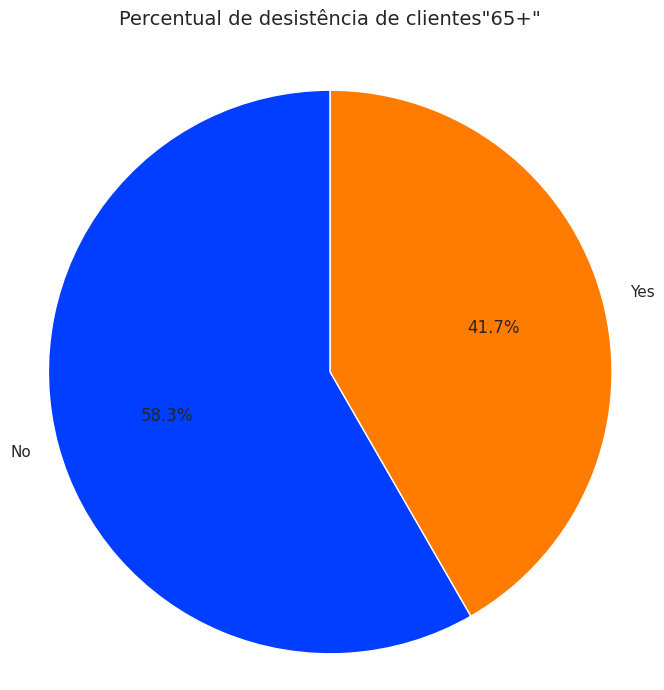

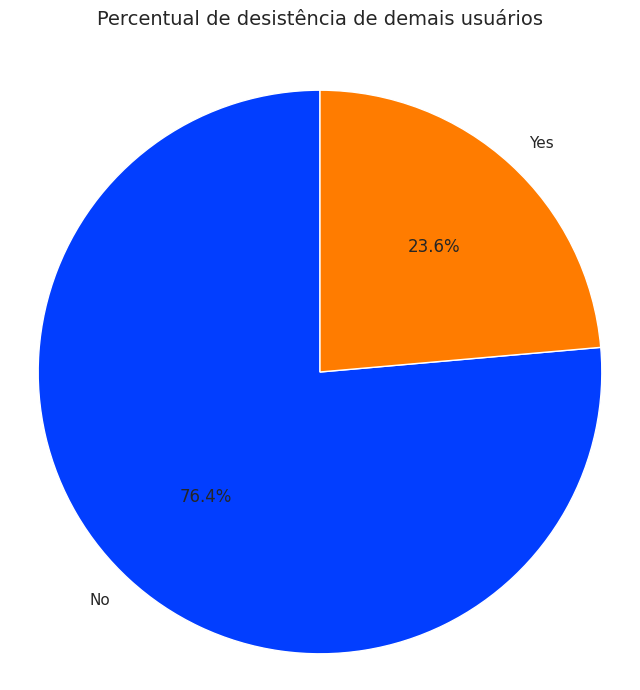

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_theme(style="whitegrid")


df['Churn'] = df['Churn'].replace('', np.nan)


df_limpo = df.dropna(subset=['Churn']).copy()



#Gráfico para Clientes 65+ (usando df_limpo)


df_65plus_limpo = df_limpo[df_limpo['Seniority_Group'] == '65+'].copy()


churn_dist_65plus_limpo = df_65plus_limpo['Churn'].value_counts()


sizes_65plus = churn_dist_65plus_limpo.values
labels_65plus = churn_dist_65plus_limpo.index
colors_65plus = sns.color_palette('bright')[0:len(labels_65plus)]


fig1, ax1 = plt.subplots(figsize=(8, 8))


ax1.pie(sizes_65plus, labels=labels_65plus, colors=colors_65plus, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title('Percentual de desistência de clientes"65+"', fontsize=14, y=1.05)
ax1.axis('equal')
plt.show()

#Gráfico para Clientes com menos de 65

df_demais_limpo = df_limpo[df_limpo['Seniority_Group'] == 'Demais_Usuários'].copy()


churn_dist_demais_limpo = df_demais_limpo['Churn'].value_counts()


sizes_demais = churn_dist_demais_limpo.values
labels_demais = churn_dist_demais_limpo.index
colors_demais = sns.color_palette('bright')[0:len(labels_demais)]


fig2, ax2 = plt.subplots(figsize=(8, 8))


ax2.pie(sizes_demais, labels=labels_demais, colors=colors_demais, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.set_title('Percentual de desistência de demais usuários', fontsize=14, y=1.05)
ax2.axis('equal')
plt.show()

O PERCENTUAL DE DESISTÊNCIA ENTRE OS 65+ é notadamente maior so que a outra faixa etária

# Gráfico Histograma Distribuição do Tempo de Contrato para Clientes que Cancelaram

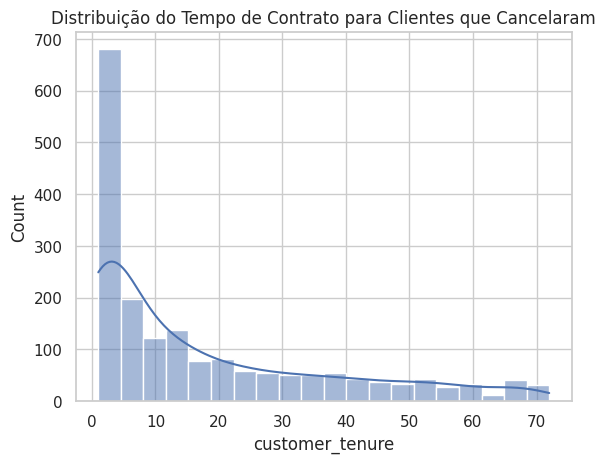

In [88]:
sns.histplot(df[df["Churn"] == "Yes"]["customer_tenure"], bins=20, kde=True)
plt.title("Distribuição do Tempo de Contrato para Clientes que Cancelaram")
plt.show()


# Gráfico de duas linhas(Histograma) Percentual de Desistência  por Tempo de Contrato: 65+ vs Menos de 65

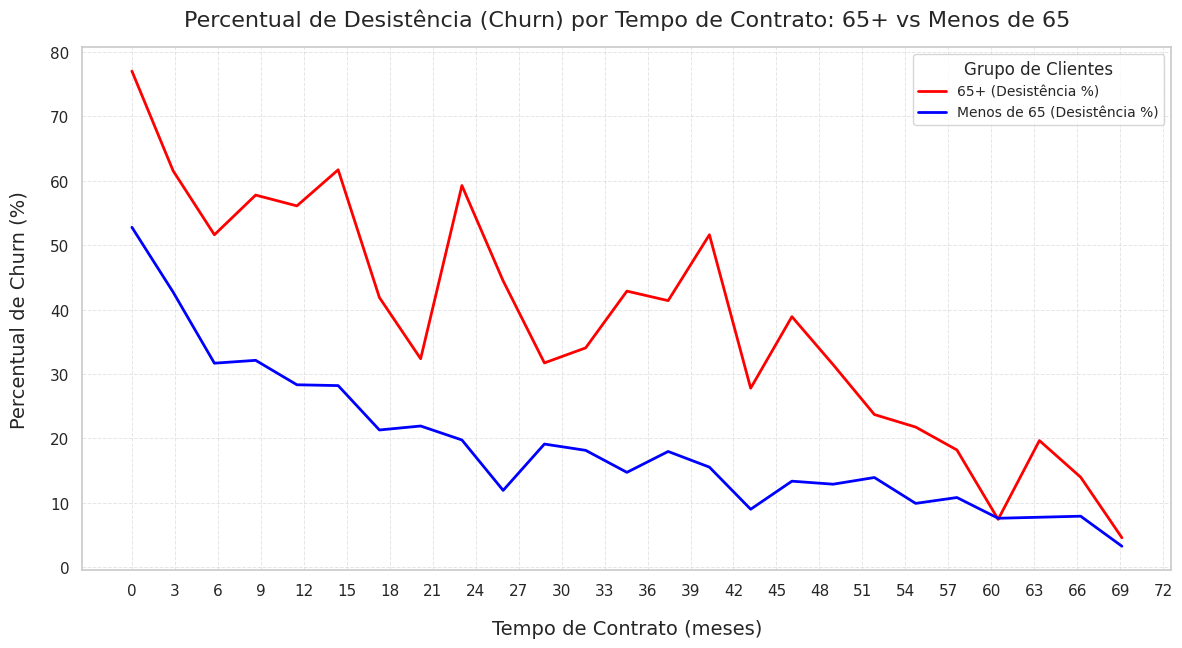

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))


max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24


tenure_bins = np.histogram_bin_edges(df['customer_tenure'], bins=num_bins)


churn_65_plus, _ = np.histogram(df[(df["customer_SeniorCitizen"] == 1) & (df["Churn"] == "Yes")]["customer_tenure"], bins=tenure_bins)
churn_under_65, _ = np.histogram(df[(df["customer_SeniorCitizen"] == 0) & (df["Churn"] == "Yes")]["customer_tenure"], bins=tenure_bins)


total_65_plus, _ = np.histogram(df[df["customer_SeniorCitizen"] == 1]["customer_tenure"], bins=tenure_bins)
total_under_65, _ = np.histogram(df[df["customer_SeniorCitizen"] == 0]["customer_tenure"], bins=tenure_bins)


percent_churn_65_plus = (churn_65_plus / total_65_plus) * 100
percent_churn_65_plus[np.isnan(percent_churn_65_plus)] = 0

percent_churn_under_65 = (churn_under_65 / total_under_65) * 100
percent_churn_under_65[np.isnan(percent_churn_under_65)] = 0


sns.lineplot(x=tenure_bins[:-1], y=percent_churn_65_plus, color="red", label="65+ (Desistência %)", linewidth=2)
sns.lineplot(x=tenure_bins[:-1], y=percent_churn_under_65, color="blue", label="Menos de 65 (Desistência %)", linewidth=2)


plt.title("Percentual de Desistência (Churn) por Tempo de Contrato: 65+ vs Menos de 65", fontsize=16, pad=15)
plt.xlabel("Tempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Percentual de Churn (%)", fontsize=14, labelpad=15)


plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)


plt.xticks(np.arange(0, max_tenure + 1, 3), rotation=0)
plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)
plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)


plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


# Gráfico de regressão: Tendências de desistência por senioridade

<ipython-input-90-1891765227>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_bin_group = df_binned.groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)
<ipython-input-90-1891765227>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_bin_group = df_binned[df_binned['Churn'] == 'Yes'].groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)


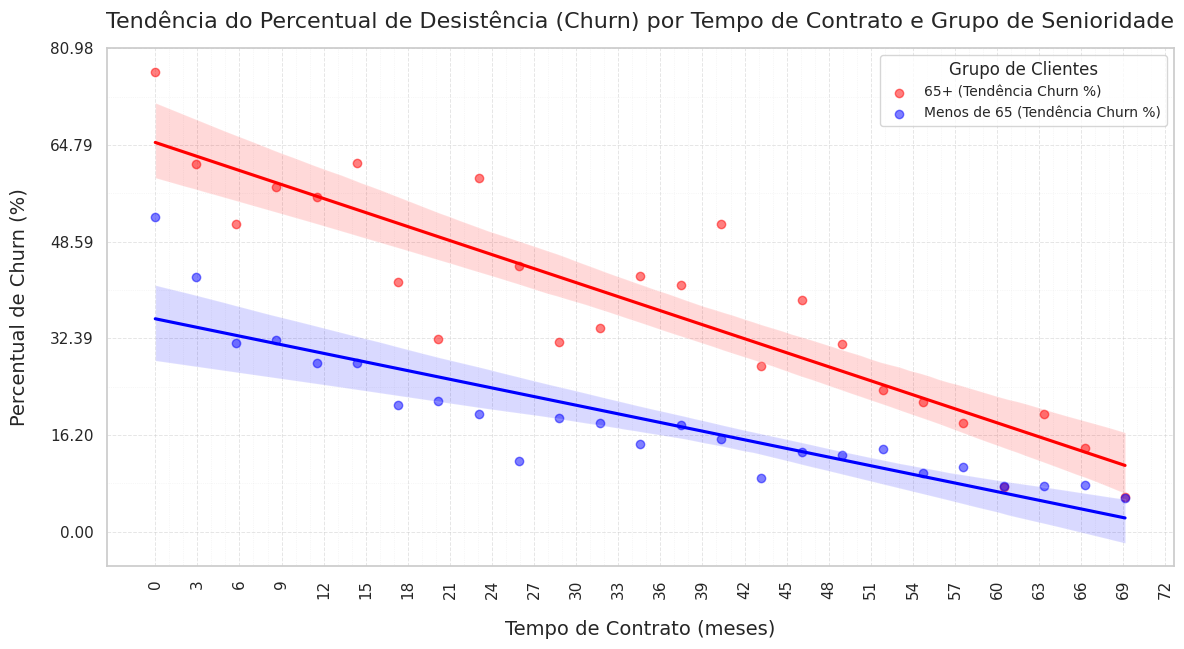

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 7))

max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24

tenure_bins = np.histogram_bin_edges(df['customer_tenure'], bins=num_bins)


df_binned = df.copy()
df_binned['Tenure_Bin'] = pd.cut(df_binned['customer_tenure'], bins=tenure_bins, labels=tenure_bins[:-1], include_lowest=True, right=False)

total_by_bin_group = df_binned.groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)
churn_by_bin_group = df_binned[df_binned['Churn'] == 'Yes'].groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)

percent_churn_by_bin_group = (churn_by_bin_group / total_by_bin_group) * 100
percent_churn_by_bin_group = percent_churn_by_bin_group.fillna(0)

percent_churn_reset = percent_churn_by_bin_group.reset_index()
percent_churn_reset.columns = ['Tenure_Bin', 'Churn_Percent_0', 'Churn_Percent_1']


sns.regplot(x=percent_churn_reset['Tenure_Bin'].astype(float),
            y=percent_churn_reset['Churn_Percent_1'],
            color="red",
            label="65+ (Tendência Churn %)",
            ci=95,
            scatter_kws={'alpha':0.5})

sns.regplot(x=percent_churn_reset['Tenure_Bin'].astype(float),
            y=percent_churn_reset['Churn_Percent_0'],
            color="blue",
            label="Menos de 65 (Tendência Churn %)",
            ci=95,
            scatter_kws={'alpha':0.5})

plt.title("Tendência do Percentual de Desistência (Churn) por Tempo de Contrato e Grupo de Senioridade", fontsize=16, pad=15)
plt.xlabel("Tempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Percentual de Churn (%)", fontsize=14, labelpad=15)
plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)


trimestre_ticks_major = np.arange(0, max_tenure + 1, 3)

plt.xticks(trimestre_ticks_major, rotation=90, ha='center')

plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

mes_ticks_minor = np.arange(0, max_tenure + 1, 1)

mes_ticks_minor = mes_ticks_minor[~np.isin(mes_ticks_minor, trimestre_ticks_major)]

plt.xticks(mes_ticks_minor, labels=['']*len(mes_ticks_minor), minor=True)

plt.grid(axis='x', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)


max_density = plt.gca().get_ylim()[1]

if max_density > 0:
    y_ticks_major = np.arange(0, max_density * 1.1, max_density / 5)
    y_ticks_minor = np.arange(0, max_density * 1.1, max_density / 10)

    plt.yticks(y_ticks_major)
    plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

    plt.yticks(y_ticks_minor, minor=True)
    plt.grid(axis='y', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)
else:
     plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

ESTE GRÁFICO DE REGRESSÃO DEMONSTRA  QUE O SEGMENTO 65+ APRESENTA UMA TENDÊNCIA MAIOR DE DESISTÊNCIA, PRINCIPALMENTE ANTES DOS PERIODOS PRÓXIMOS À VENCIMENTOS DE CONTRATOS(12, 24 E 36 MESES).
 SUGIRO QUE  ALÉM DE INVESTIR MAIS NA FAIXA-ETÁRIA COM MENOS DE 65 ANOS, SEJA FEITO UM TRABALHO DE MARKETING ESPECÍFICO PARA TRANQUILIZAR E FIDELIZAR OS 65+ ANTES DOS PERÍODOS DE VENCIMENTO NDOS CONTRATOS.

# Gráfico histograma Distribuição do tempo de contrato de clientes

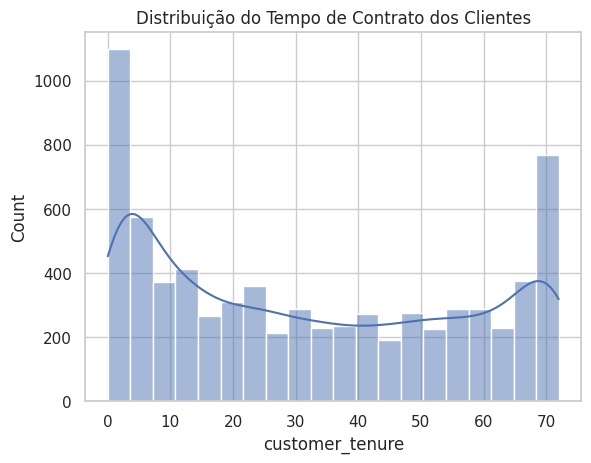

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["customer_tenure"], bins=20, kde=True)
plt.title("Distribuição do Tempo de Contrato dos Clientes")
plt.show()



O gráfico mostra três padrões importantes. Primeiro, há um grande volume de cancelamentos nos primeiros meses, indicando que muitos clientes desistem rapidamente, possivelmente por falta de incentivos ou dificuldades na adaptação inicial. Depois desse pico, os cancelamentos começam a cair e seguem estáveis, o que sugere que quem passa dessa fase tende a ficar por mais tempo. Por fim, há um leve aumento na retenção perto dos 70 meses, o que pode indicar que contratos mais longos incentivam a permanência ou que clientes fiéis recebem benefícios para continuar.

Como usar esse insight?
Focar nos primeiros meses: Oferecer suporte e benefícios para novos clientes pode reduzir cancelamentos iniciais.

Incentivar contratos mais longos: Explorar vantagens para clientes que permanecem por períodos maiores pode aumentar a retenção.

Entender quem fica por muito tempo: Identificar o perfil dos clientes mais fiéis pode ajudar a replicar estratégias para outros grupos.


# Gráfico Histograma duplo Distribuição do Tempo de Contrato:
# Clientes que Cancelaram vs Todos os Clientes

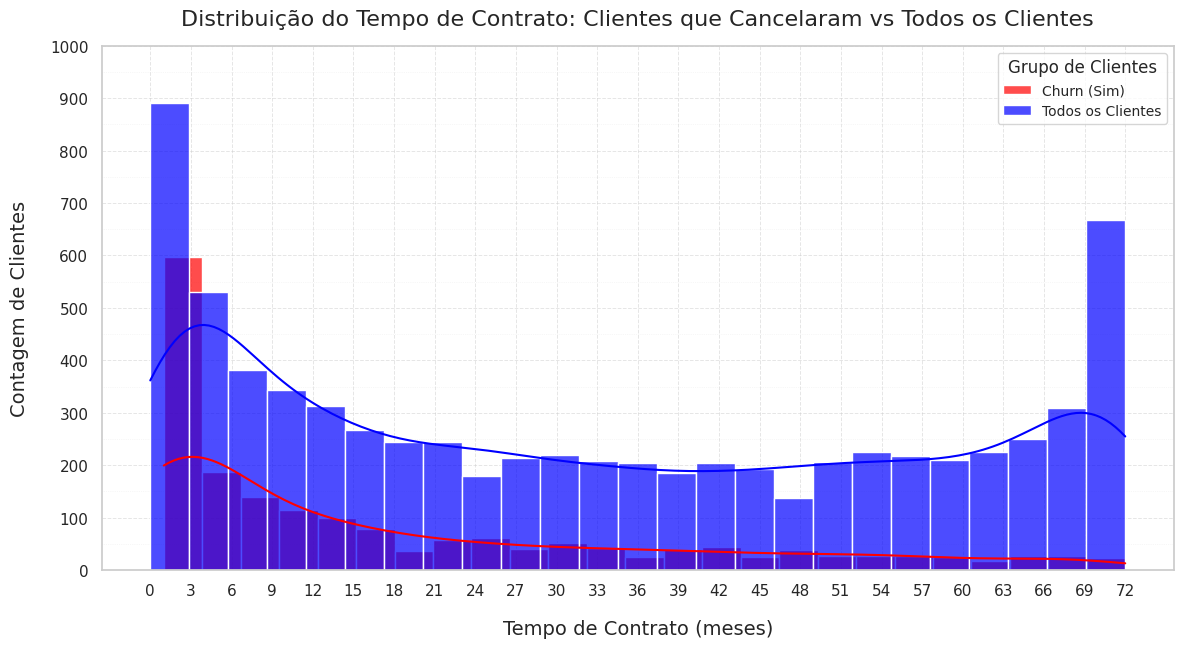

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24

sns.histplot(
    data=df[df["Churn"] == "Yes"],
    x="customer_tenure",
    bins=num_bins,
    kde=True,
    color="red",
    label="Churn (Sim)",
    alpha=0.7
)

sns.histplot(
    data=df,
    x="customer_tenure",
    bins=num_bins,
    kde=True,
    color="blue",
    label="Todos os Clientes",
    alpha=0.7
)

plt.title("Distribuição do Tempo de Contrato: Clientes que Cancelaram vs Todos os Clientes", fontsize=16, pad=15)
plt.xlabel("Tempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Contagem de Clientes", fontsize=14, labelpad=15)

plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)

trimestre_ticks_major = np.arange(0, max_tenure + 1, 3)
plt.xticks(trimestre_ticks_major, rotation=0)

plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

max_count = plt.gca().get_ylim()[1]
y_ticks_major = np.arange(0, max_count + 101, 100)
plt.yticks(y_ticks_major)

plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

y_ticks_minor = np.arange(0, max_count + 51, 50)
plt.yticks(y_ticks_minor, minor=True)

plt.grid(axis='y', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Pode-se dizer que a partir dos 18 meses há uma estabilidade nos contratos, o que sugere que se invista na retenção inicial.

# Gráfico de Barras para comparação de desistências entre tipos de contrato

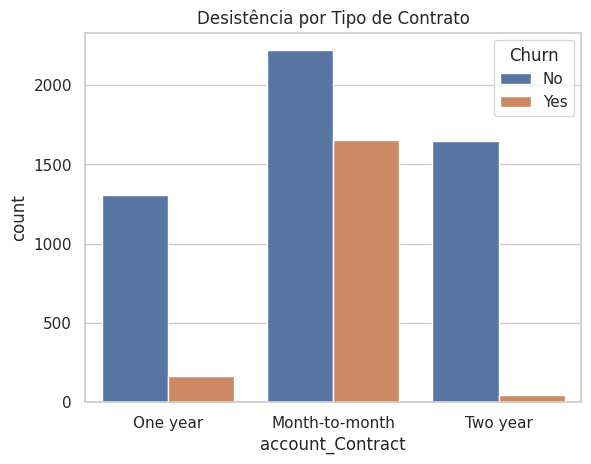

In [93]:
sns.countplot(x=df["account_Contract"], hue=df["Churn"])
plt.title("Desistência por Tipo de Contrato")
plt.show()


Fica óbvio que os contratos mensais são os que têm menos retenção.

# Gráficos de barras para análise de  diversos aspectos

Quartis de Tenure (meses):
  Q1 (25%): 9.00
  Mediana (50%): 29.00
  Q3 (75%): 55.00
------------------------------
Analisando a distribuição das seguintes características em clientes de Baixo vs. Alto Tenure:
['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']

Analisando a característica: 'customer_gender'
Tabela de Contagem:
customer_gender  Female  Male
Tenure_Group                 
Alto (> Q3)         880   933
Baixo (<= Q1)       951   976
Médio              1761  1766

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
customer_gender  Female   Male
Tenure_Group                  
Alto (> Q3)       48.54  51.46
Baixo (<= Q1)     49

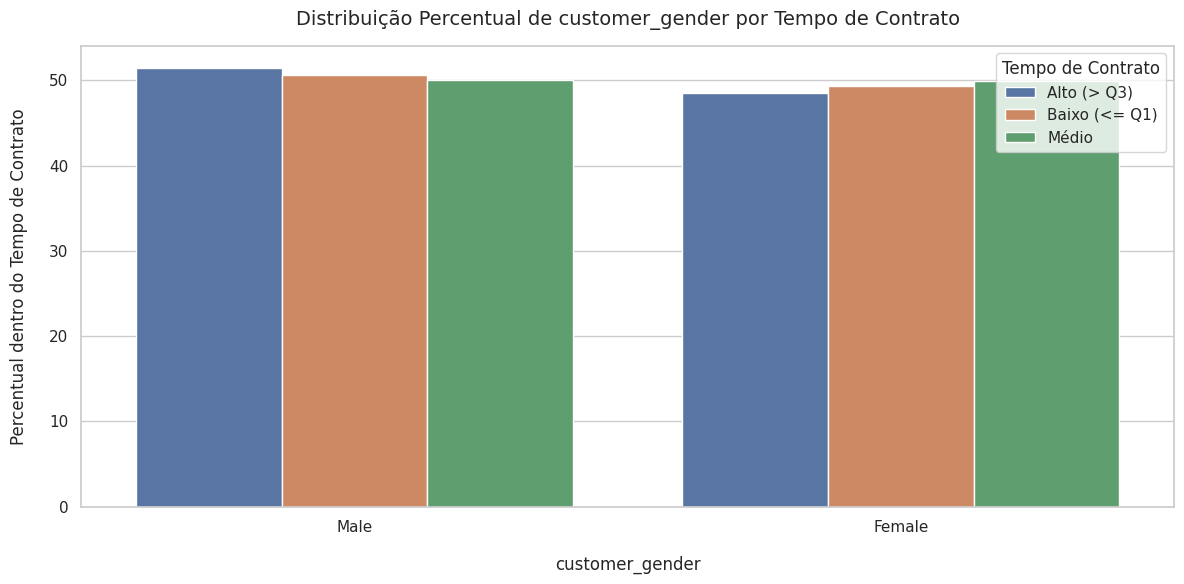



Analisando a característica: 'customer_SeniorCitizen'
Tabela de Contagem:
customer_SeniorCitizen     0    1
Tenure_Group                     
Alto (> Q3)             1512  301
Baixo (<= Q1)           1636  291
Médio                   2937  590

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
customer_SeniorCitizen      0      1
Tenure_Group                        
Alto (> Q3)             83.40  16.60
Baixo (<= Q1)           84.90  15.10
Médio                   83.27  16.73


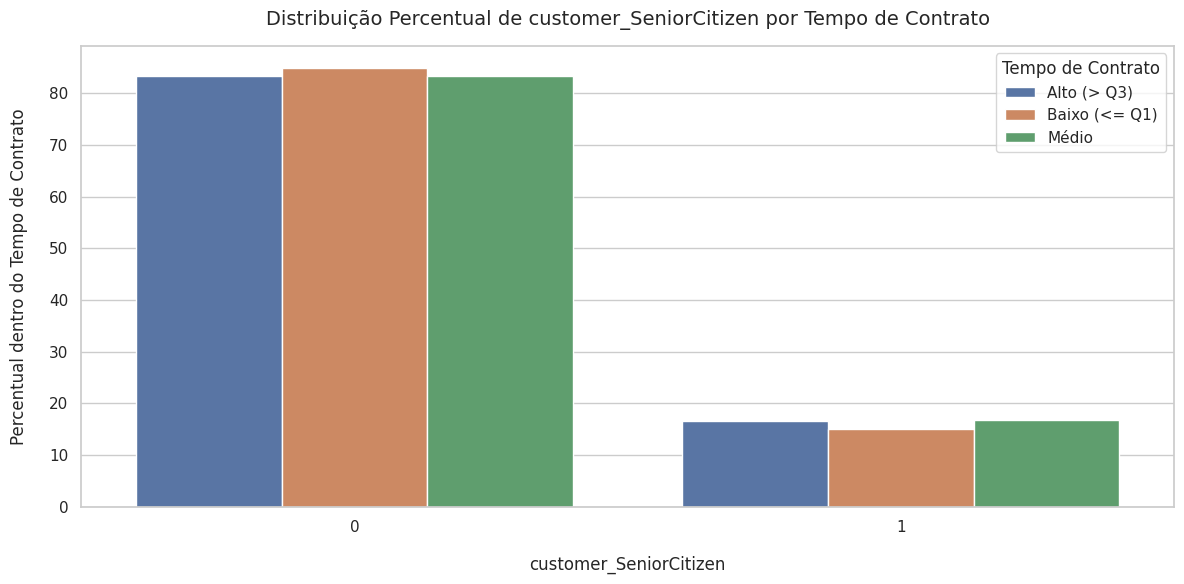



Analisando a característica: 'customer_Partner'
Tabela de Contagem:
customer_Partner    No   Yes
Tenure_Group                
Alto (> Q3)        468  1345
Baixo (<= Q1)     1452   475
Médio             1829  1698

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
customer_Partner     No    Yes
Tenure_Group                  
Alto (> Q3)       25.81  74.19
Baixo (<= Q1)     75.35  24.65
Médio             51.86  48.14


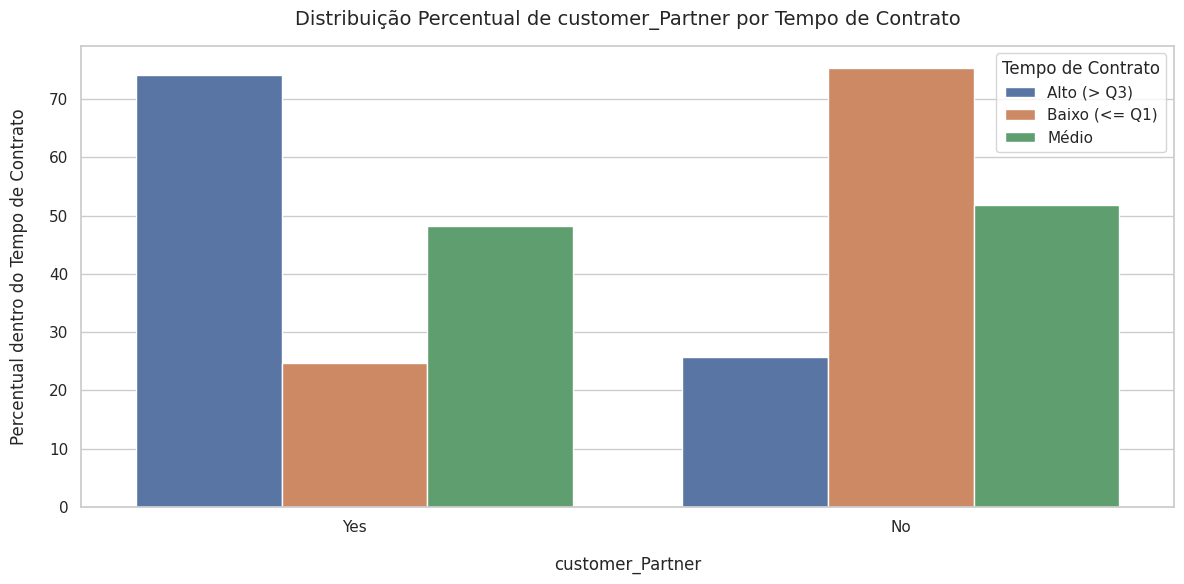



Analisando a característica: 'customer_Dependents'
Tabela de Contagem:
customer_Dependents    No   Yes
Tenure_Group                   
Alto (> Q3)          1105   708
Baixo (<= Q1)        1552   375
Médio                2429  1098

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
customer_Dependents     No    Yes
Tenure_Group                     
Alto (> Q3)          60.95  39.05
Baixo (<= Q1)        80.54  19.46
Médio                68.87  31.13


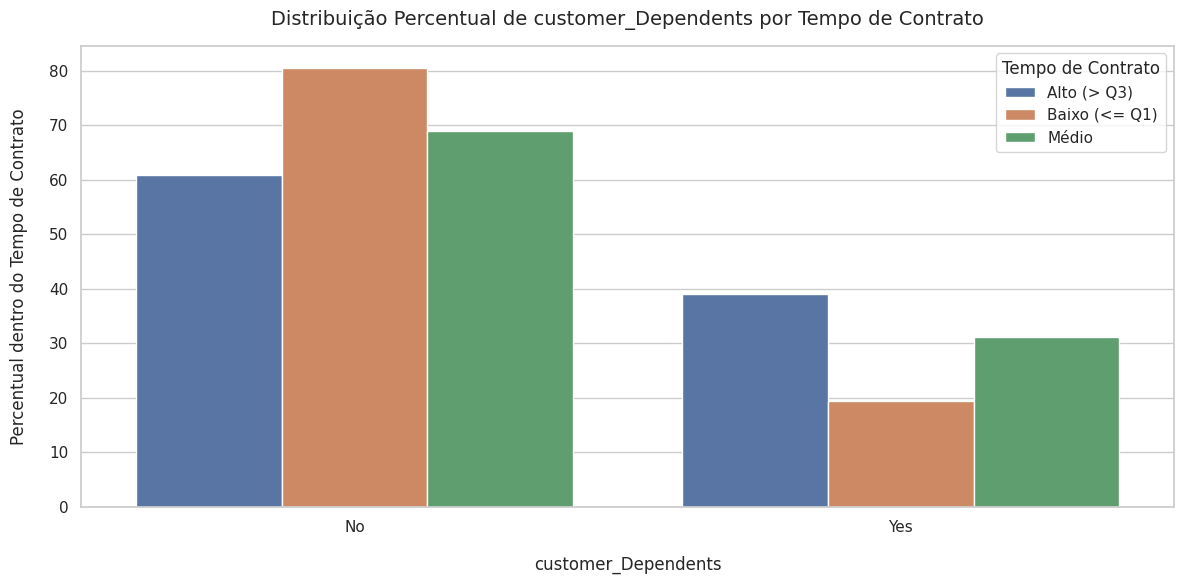



Analisando a característica: 'phone_PhoneService'
Tabela de Contagem:
phone_PhoneService   No   Yes
Tenure_Group                 
Alto (> Q3)         159  1654
Baixo (<= Q1)       194  1733
Médio               354  3173

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
phone_PhoneService     No    Yes
Tenure_Group                    
Alto (> Q3)          8.77  91.23
Baixo (<= Q1)       10.07  89.93
Médio               10.04  89.96


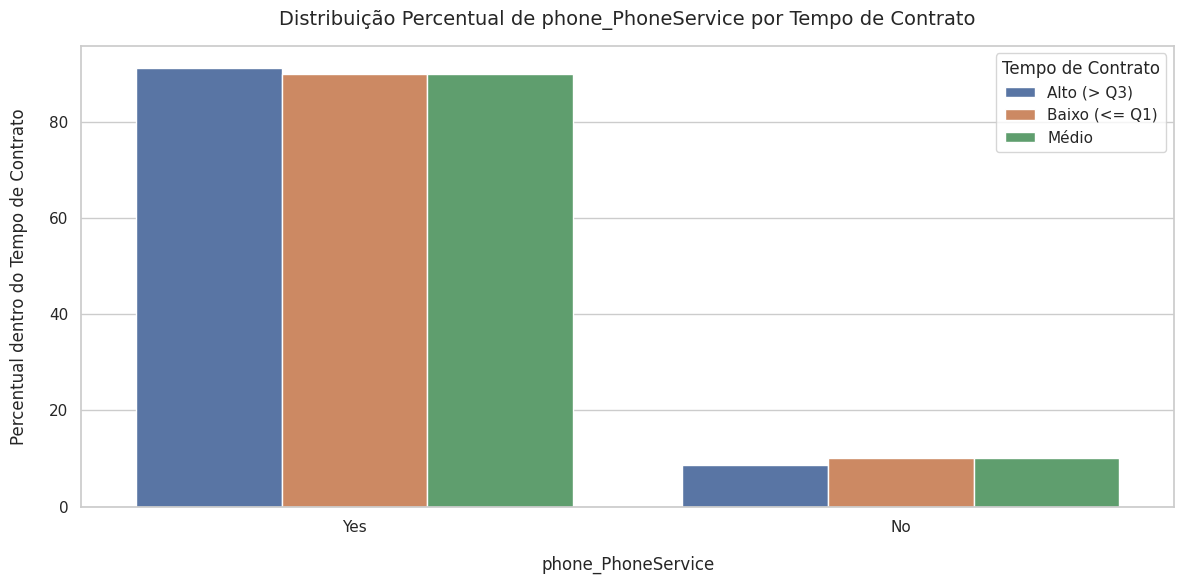



Analisando a característica: 'phone_MultipleLines'
Tabela de Contagem:
phone_MultipleLines    No  No phone service   Yes
Tenure_Group                                     
Alto (> Q3)           475               159  1179
Baixo (<= Q1)        1328               194   405
Médio                1692               354  1481

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
phone_MultipleLines     No  No phone service    Yes
Tenure_Group                                       
Alto (> Q3)          26.20              8.77  65.03
Baixo (<= Q1)        68.92             10.07  21.02
Médio                47.97             10.04  41.99


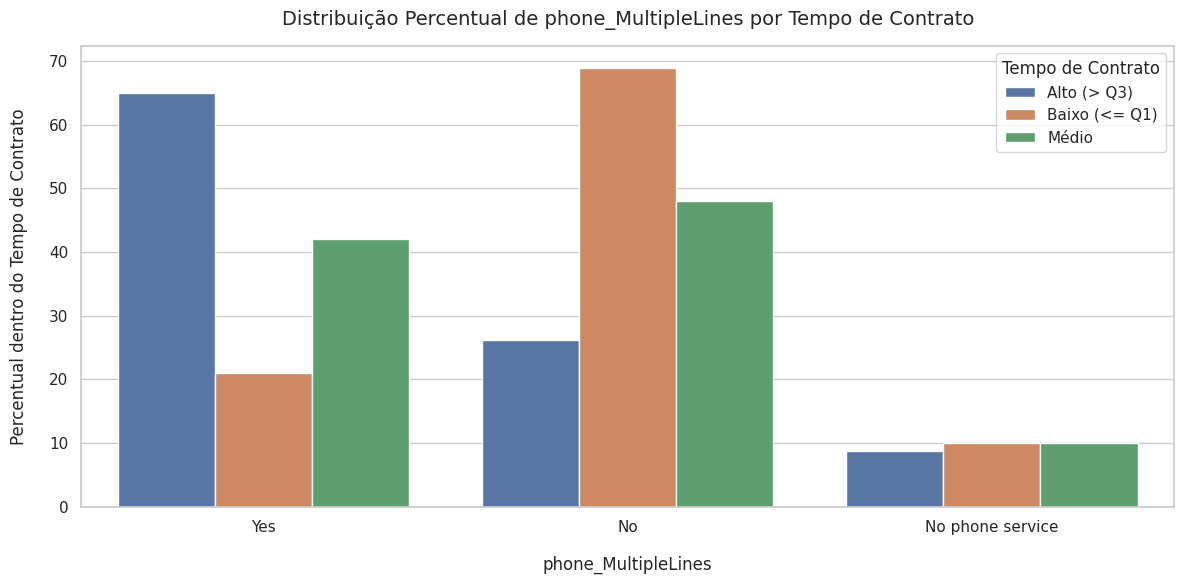



Analisando a característica: 'internet_InternetService'
Tabela de Contagem:
internet_InternetService   DSL  Fiber optic   No
Tenure_Group                                    
Alto (> Q3)                638          819  356
Baixo (<= Q1)              665          817  445
Médio                     1185         1562  780

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_InternetService    DSL  Fiber optic     No
Tenure_Group                                       
Alto (> Q3)               35.19        45.17  19.64
Baixo (<= Q1)             34.51        42.40  23.09
Médio                     33.60        44.29  22.12


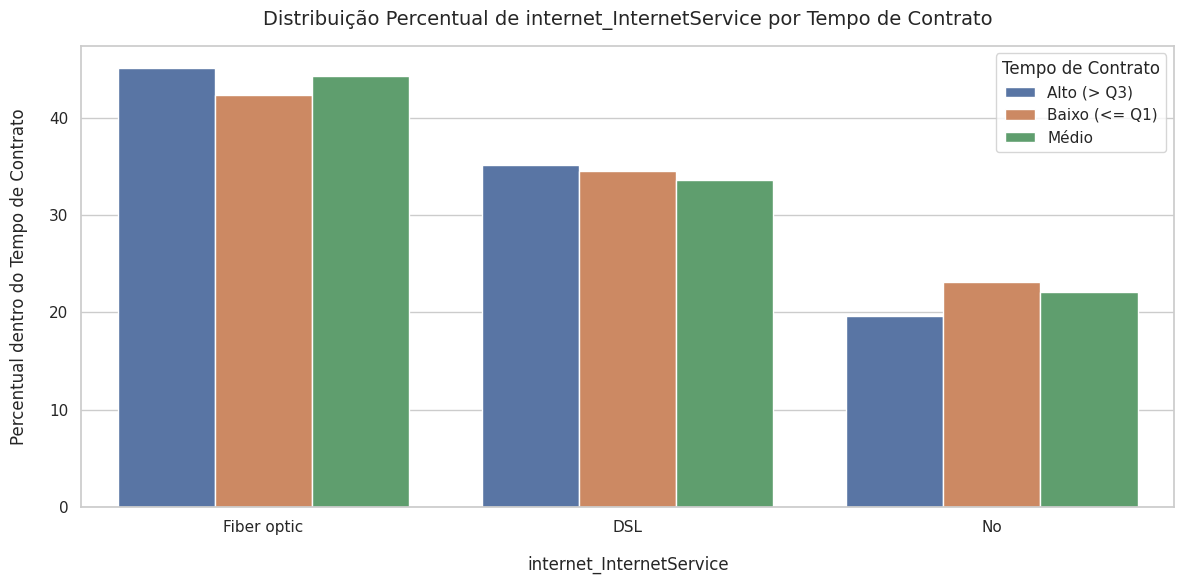



Analisando a característica: 'internet_OnlineSecurity'
Tabela de Contagem:
internet_OnlineSecurity    No  No internet service  Yes
Tenure_Group                                           
Alto (> Q3)               558                  356  899
Baixo (<= Q1)            1258                  445  224
Médio                    1792                  780  955

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_OnlineSecurity     No  No internet service    Yes
Tenure_Group                                              
Alto (> Q3)              30.78                19.64  49.59
Baixo (<= Q1)            65.28                23.09  11.62
Médio                    50.81                22.12  27.08


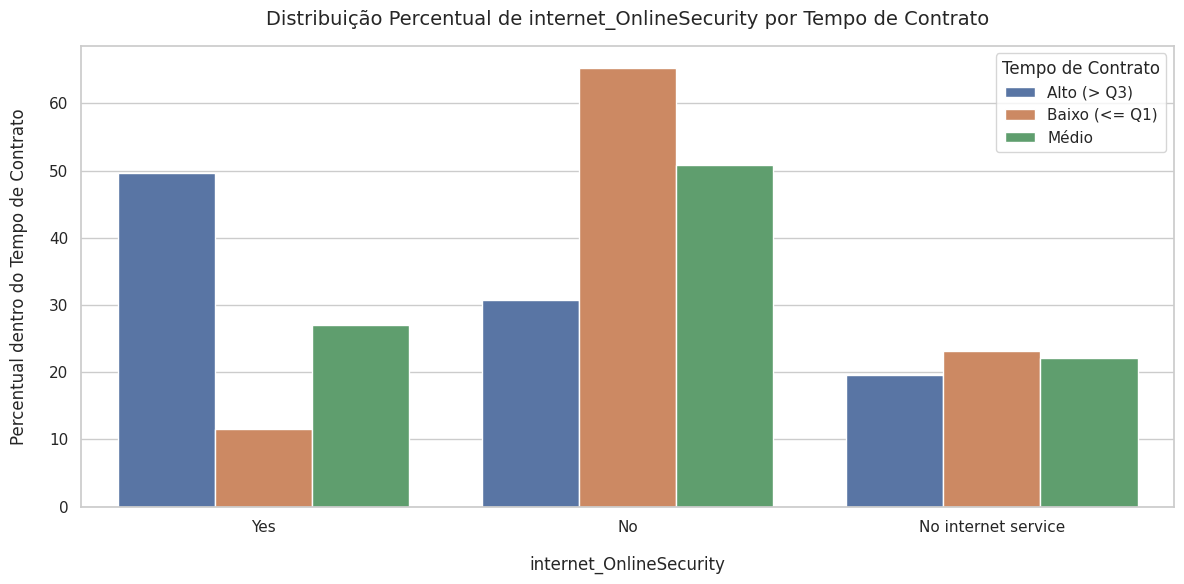



Analisando a característica: 'internet_OnlineBackup'
Tabela de Contagem:
internet_OnlineBackup    No  No internet service   Yes
Tenure_Group                                          
Alto (> Q3)             392                  356  1065
Baixo (<= Q1)          1198                  445   284
Médio                  1592                  780  1155

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_OnlineBackup     No  No internet service    Yes
Tenure_Group                                            
Alto (> Q3)            21.62                19.64  58.74
Baixo (<= Q1)          62.17                23.09  14.74
Médio                  45.14                22.12  32.75


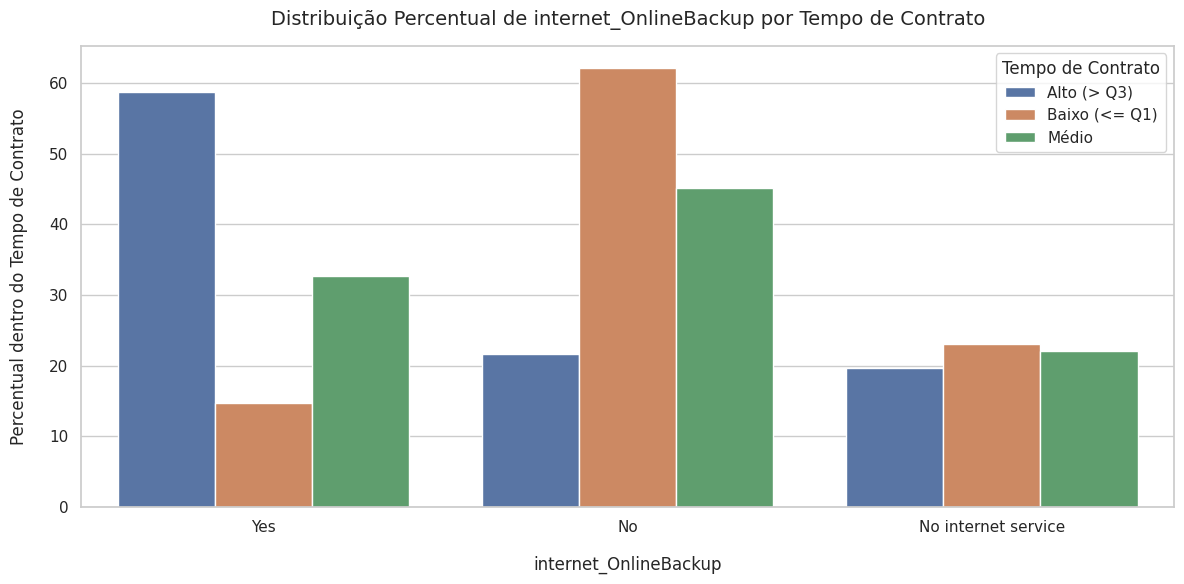



Analisando a característica: 'internet_DeviceProtection'
Tabela de Contagem:
internet_DeviceProtection    No  No internet service   Yes
Tenure_Group                                              
Alto (> Q3)                 403                  356  1054
Baixo (<= Q1)              1217                  445   265
Médio                      1575                  780  1172

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_DeviceProtection     No  No internet service    Yes
Tenure_Group                                                
Alto (> Q3)                22.23                19.64  58.14
Baixo (<= Q1)              63.16                23.09  13.75
Médio                      44.66                22.12  33.23


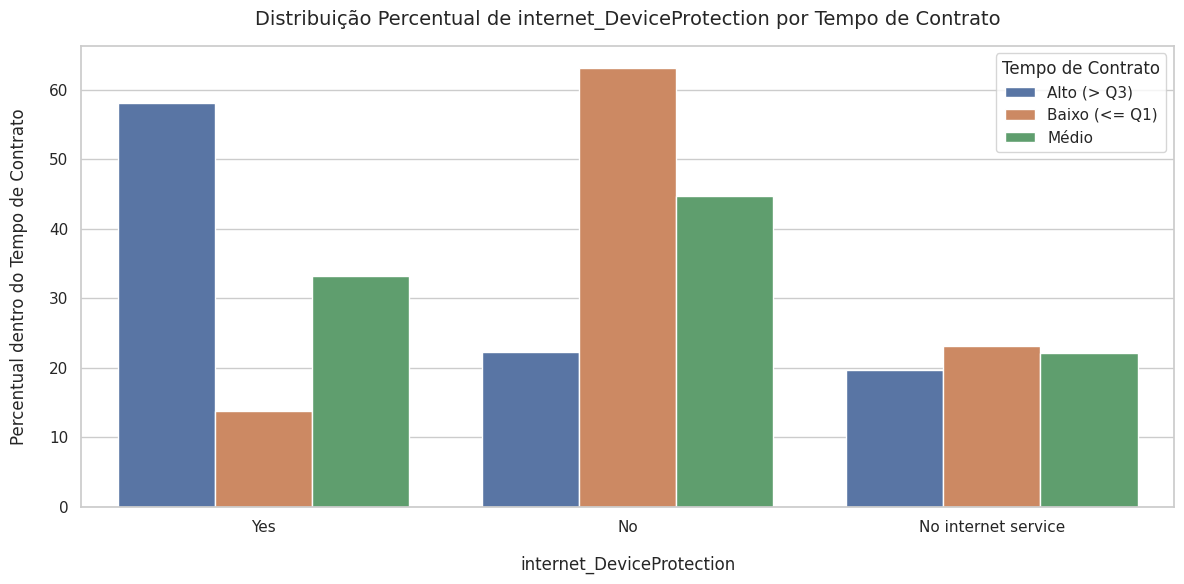



Analisando a característica: 'internet_TechSupport'
Tabela de Contagem:
internet_TechSupport    No  No internet service  Yes
Tenure_Group                                        
Alto (> Q3)            554                  356  903
Baixo (<= Q1)         1255                  445  227
Médio                 1773                  780  974

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_TechSupport     No  No internet service    Yes
Tenure_Group                                           
Alto (> Q3)           30.56                19.64  49.81
Baixo (<= Q1)         65.13                23.09  11.78
Médio                 50.27                22.12  27.62


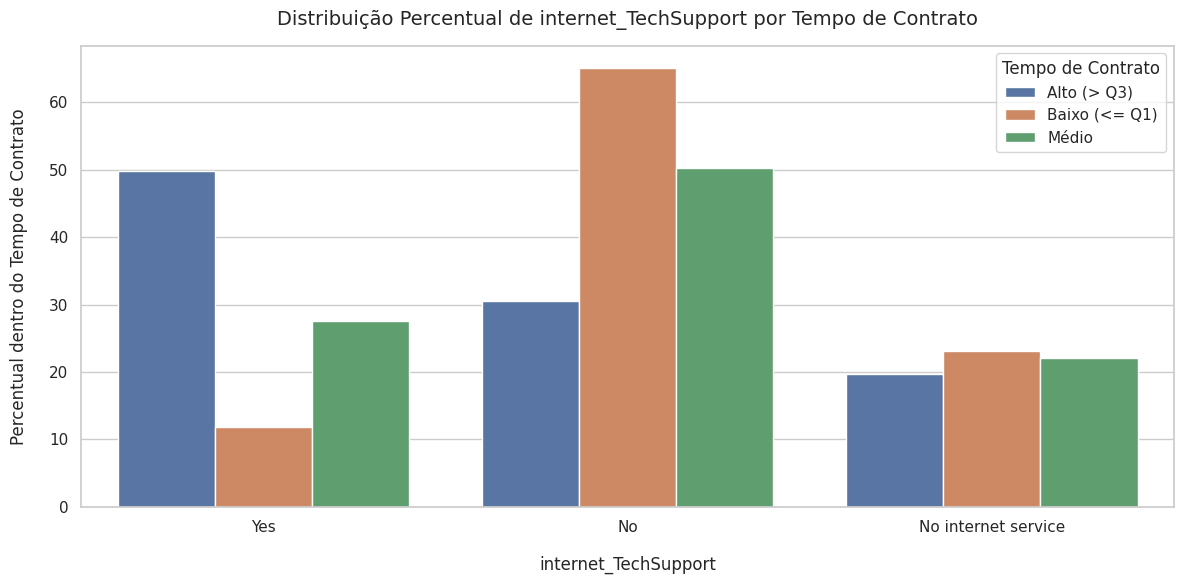



Analisando a característica: 'internet_StreamingTV'
Tabela de Contagem:
internet_StreamingTV    No  No internet service   Yes
Tenure_Group                                         
Alto (> Q3)            427                  356  1030
Baixo (<= Q1)         1069                  445   413
Médio                 1400                  780  1347

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_StreamingTV     No  No internet service    Yes
Tenure_Group                                           
Alto (> Q3)           23.55                19.64  56.81
Baixo (<= Q1)         55.47                23.09  21.43
Médio                 39.69                22.12  38.19


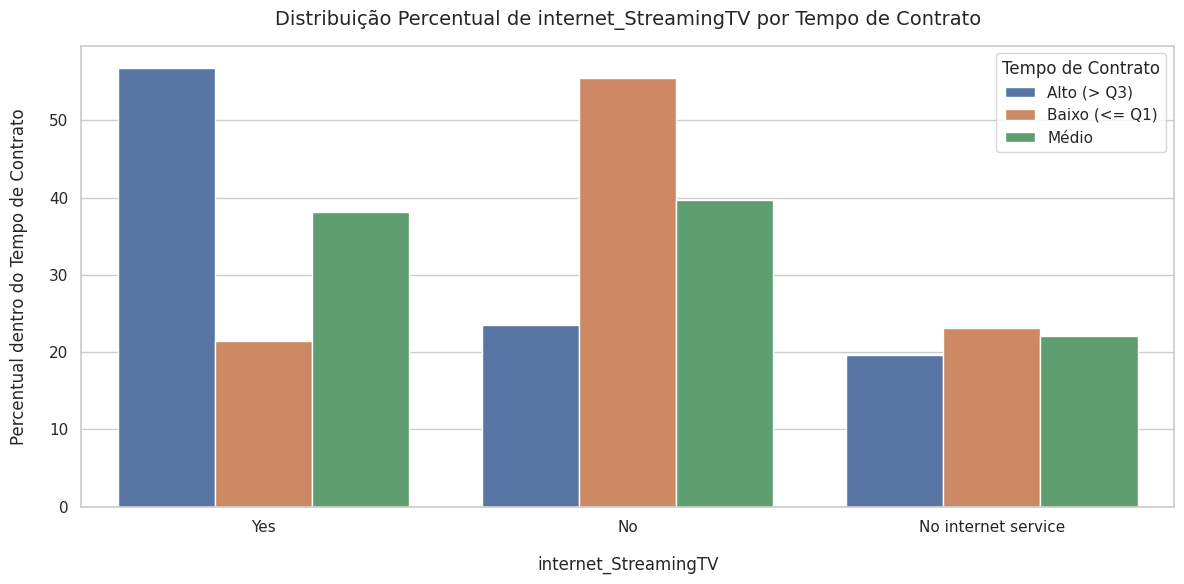



Analisando a característica: 'internet_StreamingMovies'
Tabela de Contagem:
internet_StreamingMovies    No  No internet service   Yes
Tenure_Group                                             
Alto (> Q3)                413                  356  1044
Baixo (<= Q1)             1074                  445   408
Médio                     1383                  780  1364

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
internet_StreamingMovies     No  No internet service    Yes
Tenure_Group                                               
Alto (> Q3)               22.78                19.64  57.58
Baixo (<= Q1)             55.73                23.09  21.17
Médio                     39.21                22.12  38.67


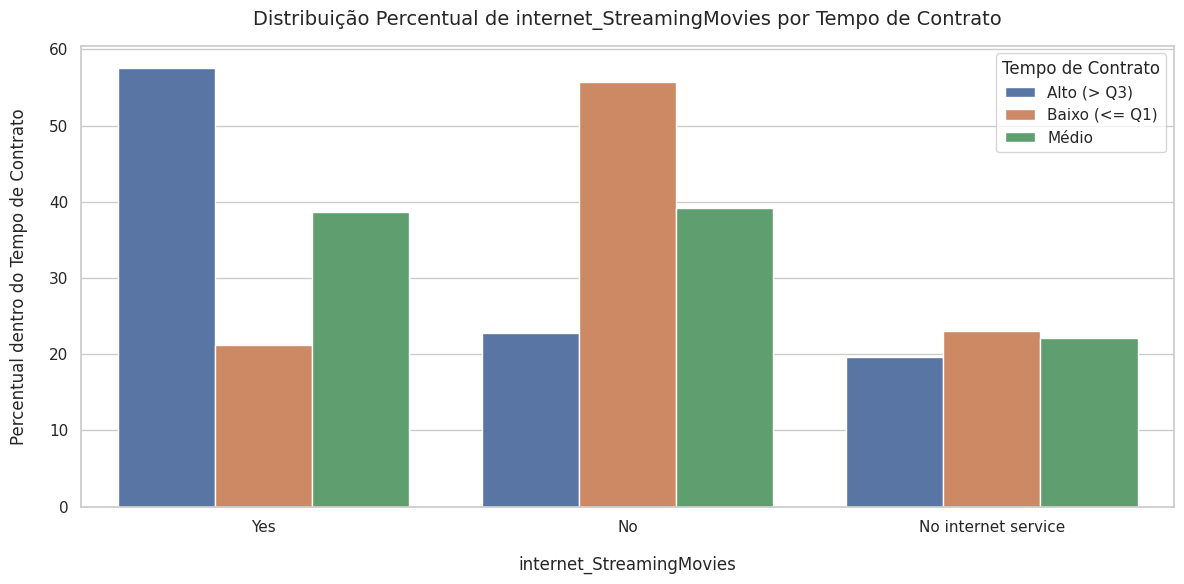



Analisando a característica: 'account_Contract'
Tabela de Contagem:
account_Contract  Month-to-month  One year  Two year
Tenure_Group                                        
Alto (> Q3)                  203       454      1156
Baixo (<= Q1)               1801        76        50
Médio                       2001       989       537

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
account_Contract  Month-to-month  One year  Two year
Tenure_Group                                        
Alto (> Q3)                11.20     25.04     63.76
Baixo (<= Q1)              93.46      3.94      2.59
Médio                      56.73     28.04     15.23


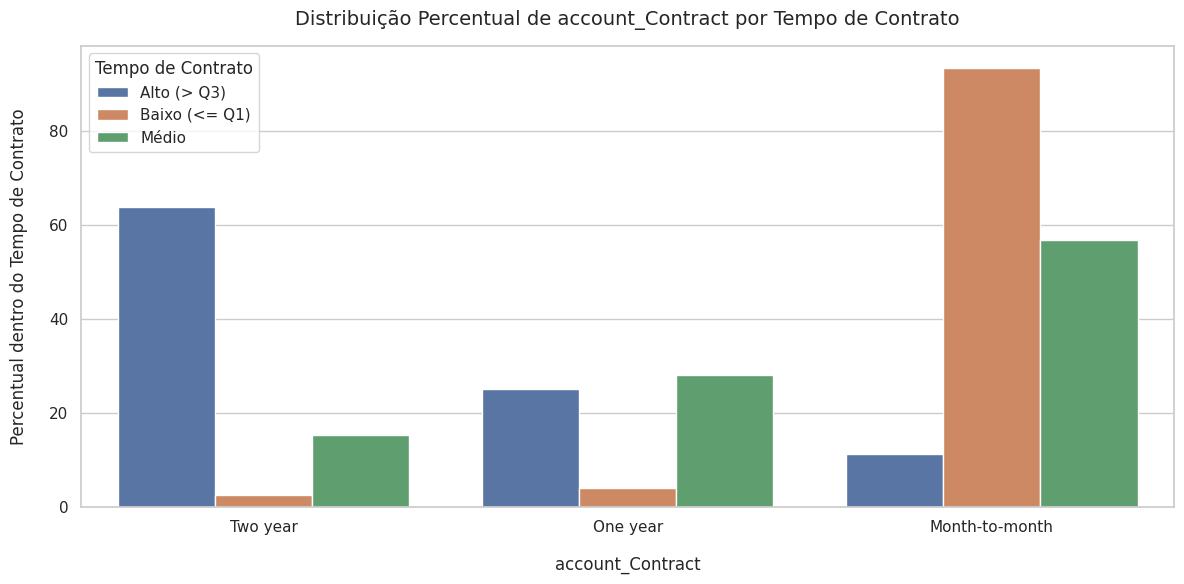



Analisando a característica: 'account_PaperlessBilling'
Tabela de Contagem:
account_PaperlessBilling    No   Yes
Tenure_Group                        
Alto (> Q3)                718  1095
Baixo (<= Q1)              804  1123
Médio                     1434  2093

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
account_PaperlessBilling     No    Yes
Tenure_Group                          
Alto (> Q3)               39.60  60.40
Baixo (<= Q1)             41.72  58.28
Médio                     40.66  59.34


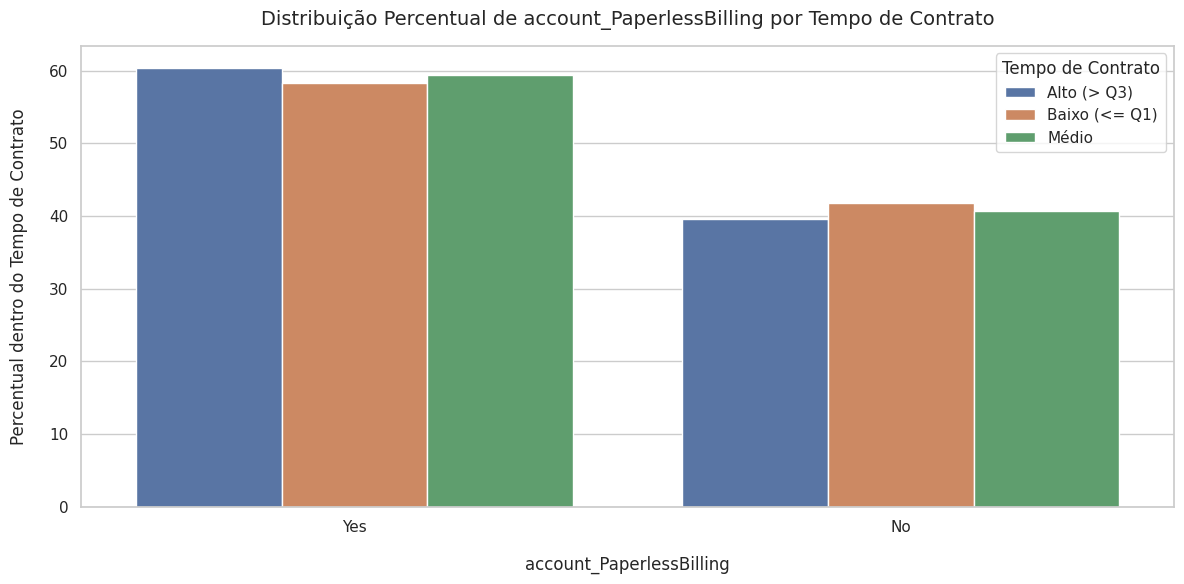



Analisando a característica: 'account_PaymentMethod'
Tabela de Contagem:
account_PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Tenure_Group                                                                
Alto (> Q3)                                  634                      630   
Baixo (<= Q1)                                178                      181   
Médio                                        777                      757   

account_PaymentMethod  Electronic check  Mailed check  
Tenure_Group                                           
Alto (> Q3)                         363           186  
Baixo (<= Q1)                       874           694  
Médio                              1208           785  

Tabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):
account_PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Tenure_Group                                                                
Alto (> Q3)                           

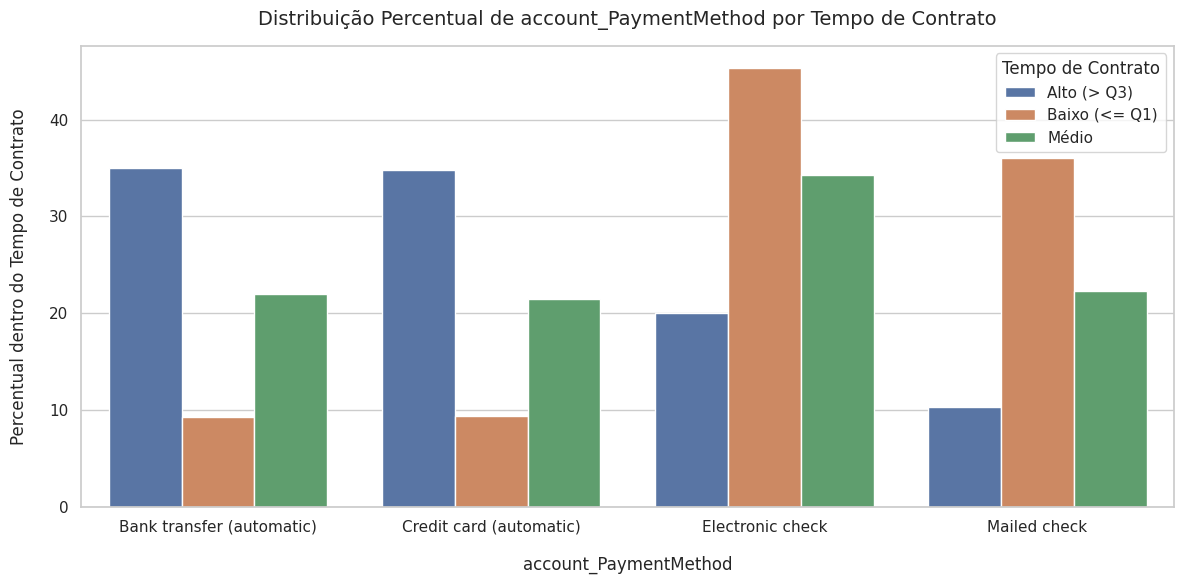

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df.dropna(subset=['customer_tenure'], inplace=True) # Remover linhas onde tenure não é um número válido


quartiles = df['customer_tenure'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
median = quartiles[0.5]
q3 = quartiles[0.75]

print(f"Quartis de Tenure (meses):")
print(f"  Q1 (25%): {q1:.2f}")
print(f"  Mediana (50%): {median:.2f}")
print(f"  Q3 (75%): {q3:.2f}")
print("-" * 30)

# Criar grupos de tenure
df['Tenure_Group'] = 'Médio'
df.loc[df['customer_tenure'] <= q1, 'Tenure_Group'] = 'Baixo (<= Q1)'
df.loc[df['customer_tenure'] > q3, 'Tenure_Group'] = 'Alto (> Q3)'


colunas_analise = [
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV' ,
    'internet_StreamingMovies' ,
    'account_Contract',
    'account_PaperlessBilling',
    'account_PaymentMethod',

]

print("Analisando a distribuição das seguintes características em clientes de Baixo vs. Alto Tenure:")
print(colunas_analise)
print("="*60)



for col in colunas_analise:
    print(f"\nAnalisando a característica: '{col}'")


    contingency_table = pd.crosstab(df['Tenure_Group'], df[col])
    print("Tabela de Contagem:")
    print(contingency_table)


    contingency_percent = contingency_table.apply(lambda x: x/x.sum(), axis=1) * 100
    print("\nTabela de Percentual (Percentual DENTRO de cada Grupo de Tenure):")
    print(contingency_percent.round(2))



    plot_data_count = df.groupby('Tenure_Group')[col].value_counts(normalize=False).rename('count').reset_index()

    plot_data_percent = df.groupby('Tenure_Group')[col].value_counts(normalize=True).rename('percentage').reset_index()
    plot_data_percent['percentage'] = plot_data_percent['percentage'] * 100

    plt.figure(figsize=(12, 6))

    sns.barplot(data=plot_data_percent, x=col, y='percentage', hue='Tenure_Group')
    plt.title(f'Distribuição Percentual de {col} por Tempo de Contrato', fontsize=14, pad=15)
    plt.xlabel(col, fontsize=12, labelpad=15)
    plt.ylabel('Percentual dentro do Tempo de Contrato', labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Tempo de Contrato')
    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)

In [95]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Seniority_Group',
       'Tenure_Group'],
      dtype='object')

# Gráfico de Barras para Contagem de Clientes por Segurança Online e Desistências

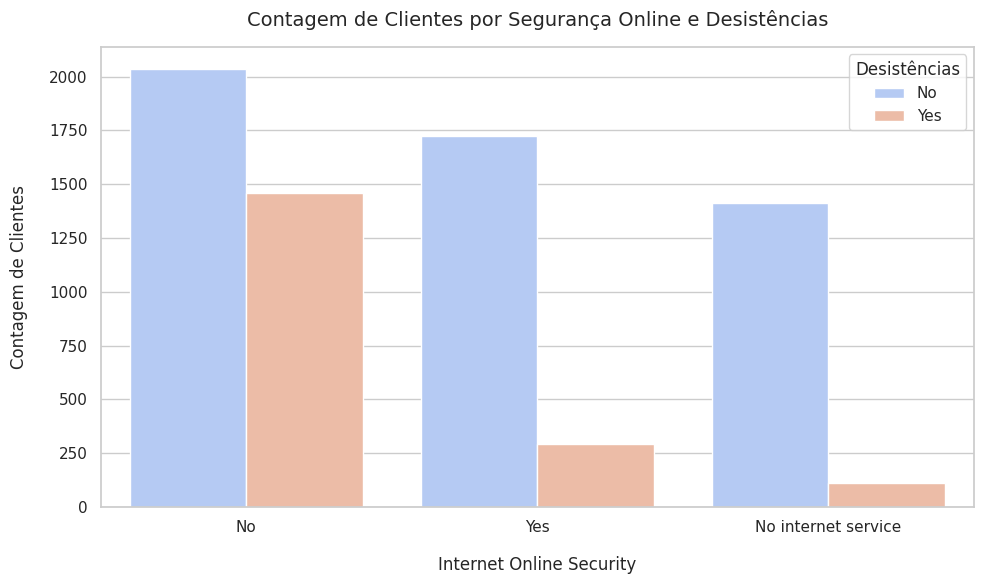

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='internet_OnlineSecurity', hue='Churn', palette='coolwarm')

plt.title('Contagem de Clientes por Segurança Online e Desistências',pad=15, fontsize=14)
plt.xlabel('Internet Online Security', labelpad=15, fontsize=12)
plt.ylabel('Contagem de Clientes', labelpad=15,fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Desistências', loc='upper right')

plt.tight_layout()
plt.show()


Os clientes que têm segurança online tendem a permanecer mais tempo.
A falta de segurança online pode estar ligada a maior taxa de desistência.

#Gráfico Scatter relação Ttempo de Contrato e Contas Mensais vs. Desistências.

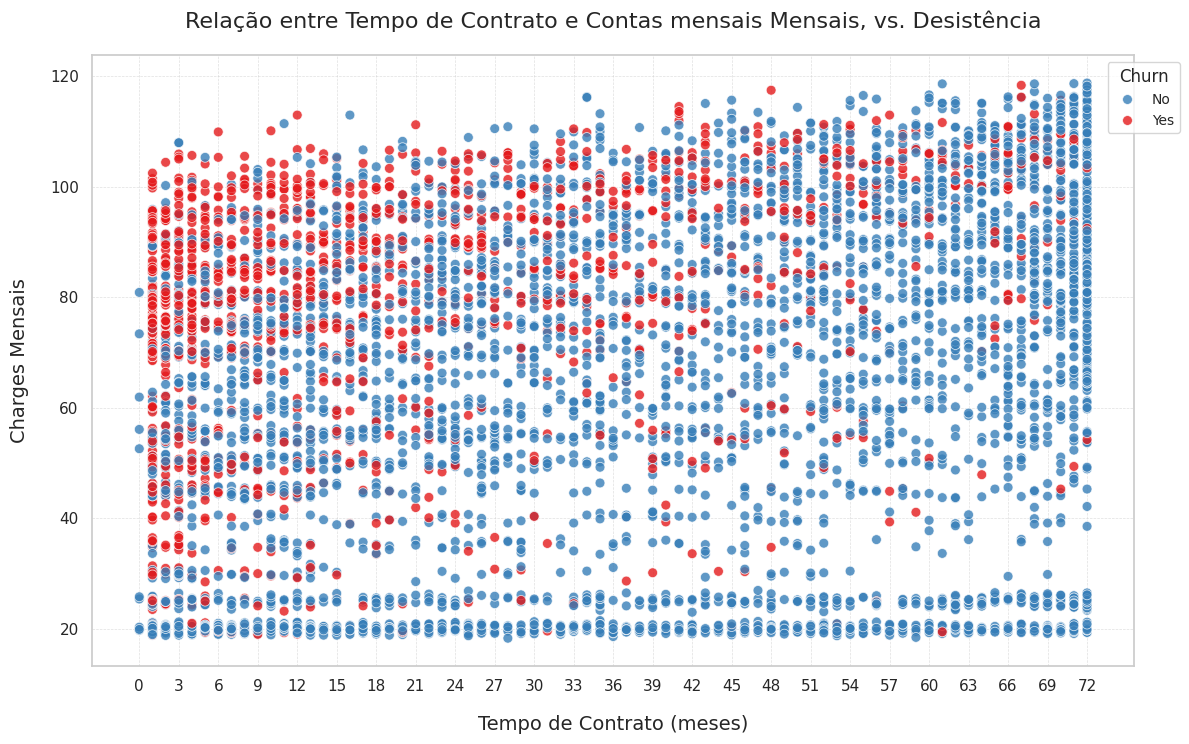

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


custom_palette = {'Yes': '#E41A1C', 'No': '#377EB8'}

plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='customer_tenure', y='account_Charges_Monthly', hue='Churn', alpha=0.8,  palette=custom_palette, s=50)



plt.title('Relação entre Tempo de Contrato e Contas mensais Mensais, vs. Desistência', fontsize=16, pad=20)
plt.xlabel('Tempo de Contrato (meses)', fontsize=14, labelpad=15)
plt.ylabel('Charges Mensais', fontsize=14, labelpad=15)
plt.legend(title='Churn', title_fontsize='12', fontsize='10', loc='upper right', bbox_to_anchor=(1.05, 1))


max_tenure = df['customer_tenure'].max()
trimestre_ticks = np.arange(0, max_tenure + 1, 3)
plt.xticks(trimestre_ticks, rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

 Os clientes com charges mensais altas têm maior probabilidade de desistência.
 A partir do mês 18 começa a haver uma diminuição de desistências nas faixas de gastos acima de $80.
 A sugestão é que os principais serviços, no usuários de faixas de maior desistência, não ultrapassem este valor, caso ultrapassem, que lhes sejam dadas compensações ou descontos.

# Gráficos de Barras Desistências vs. tipos de serviços

Análise de Churn por Serviço:

Analisando o serviço: 'phone_PhoneService'
Tabela de Contagem:
Churn                 No   Yes
phone_PhoneService            
No                   512   170
Yes                 4662  1699

Percentual de Churn (%):
Churn                  No    Yes
phone_PhoneService              
No                  75.07  24.93
Yes                 73.29  26.71


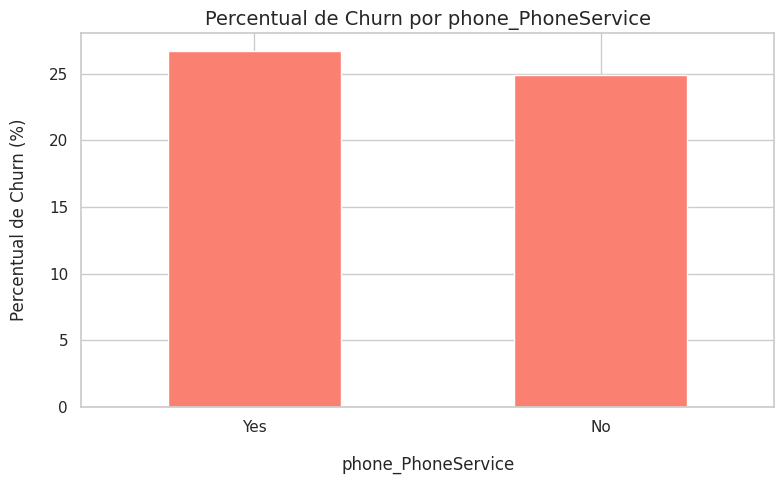

----------------------------------------

Analisando o serviço: 'phone_MultipleLines'
Tabela de Contagem:
Churn                  No  Yes
phone_MultipleLines           
No                   2541  849
No phone service      512  170
Yes                  2121  850

Percentual de Churn (%):
Churn                   No    Yes
phone_MultipleLines              
No                   74.96  25.04
No phone service     75.07  24.93
Yes                  71.39  28.61


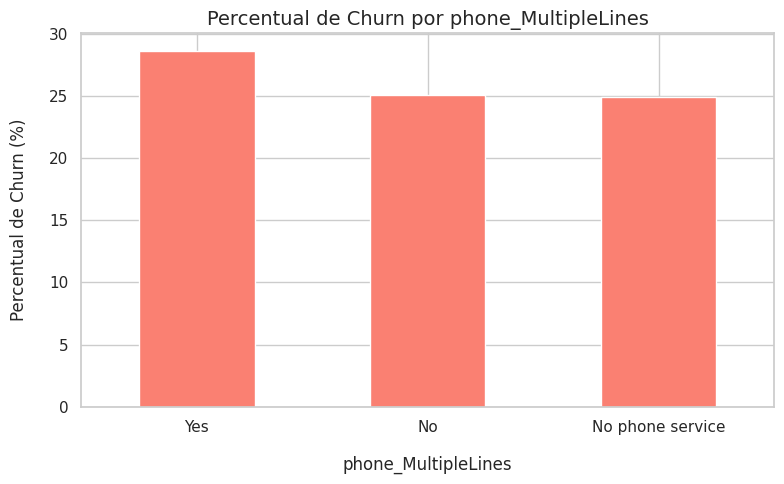

----------------------------------------

Analisando o serviço: 'internet_InternetService'
Tabela de Contagem:
Churn                       No   Yes
internet_InternetService            
DSL                       1962   459
Fiber optic               1799  1297
No                        1413   113

Percentual de Churn (%):
Churn                        No    Yes
internet_InternetService              
DSL                       81.04  18.96
Fiber optic               58.11  41.89
No                        92.60   7.40


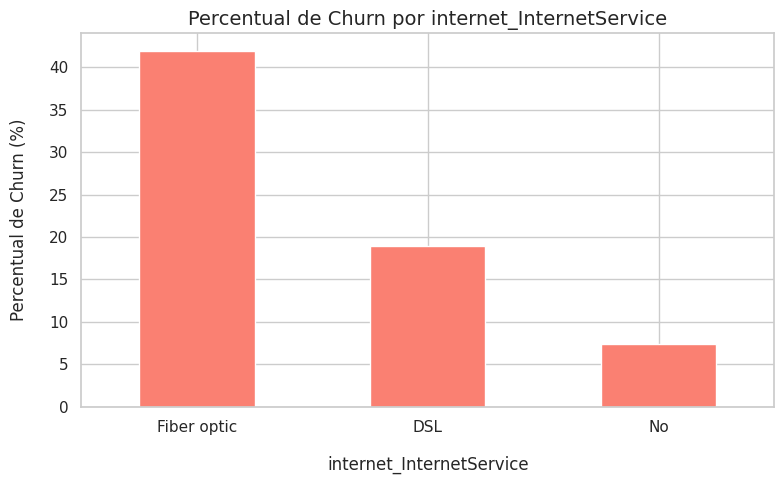

----------------------------------------

Analisando o serviço: 'internet_OnlineSecurity'
Tabela de Contagem:
Churn                      No   Yes
internet_OnlineSecurity            
No                       2037  1461
No internet service      1413   113
Yes                      1724   295

Percentual de Churn (%):
Churn                       No    Yes
internet_OnlineSecurity              
No                       58.23  41.77
No internet service      92.60   7.40
Yes                      85.39  14.61


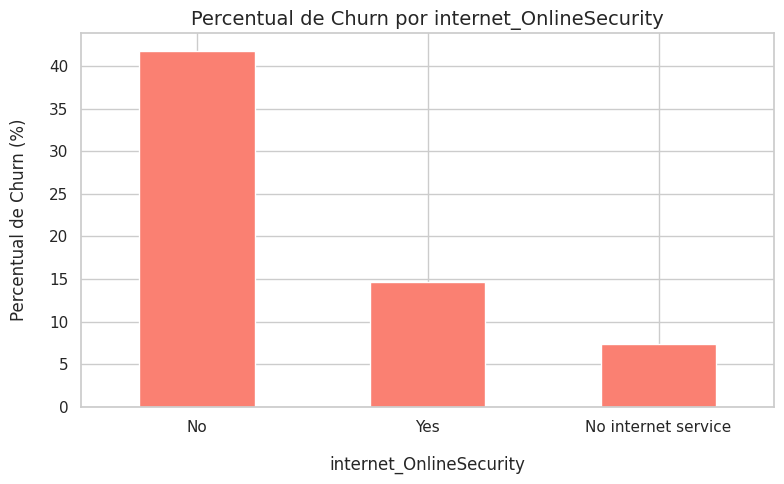

----------------------------------------

Analisando o serviço: 'internet_OnlineBackup'
Tabela de Contagem:
Churn                    No   Yes
internet_OnlineBackup            
No                     1855  1233
No internet service    1413   113
Yes                    1906   523

Percentual de Churn (%):
Churn                     No    Yes
internet_OnlineBackup              
No                     60.07  39.93
No internet service    92.60   7.40
Yes                    78.47  21.53


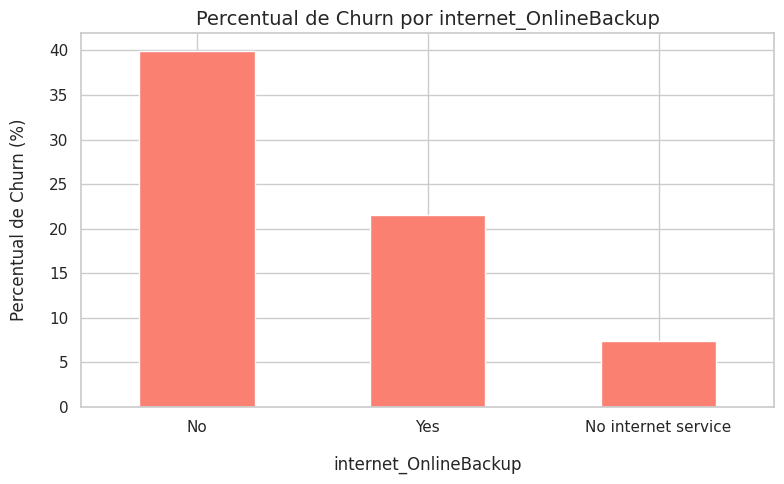

----------------------------------------

Analisando o serviço: 'internet_DeviceProtection'
Tabela de Contagem:
Churn                        No   Yes
internet_DeviceProtection            
No                         1884  1211
No internet service        1413   113
Yes                        1877   545

Percentual de Churn (%):
Churn                         No    Yes
internet_DeviceProtection              
No                         60.87  39.13
No internet service        92.60   7.40
Yes                        77.50  22.50


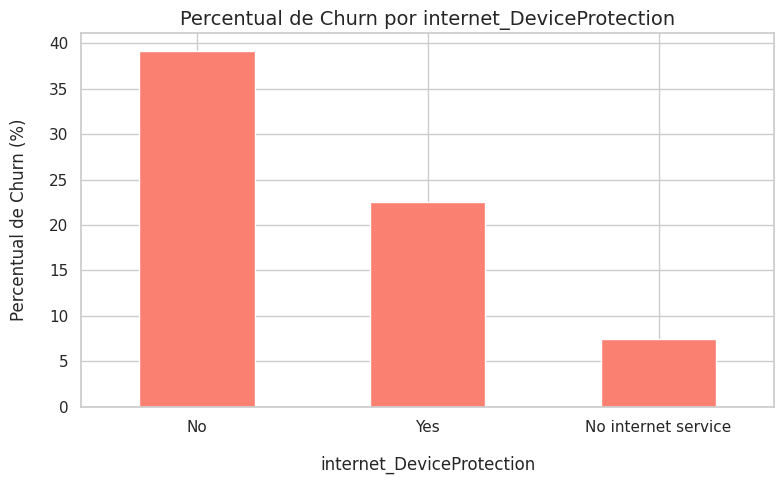

----------------------------------------

Analisando o serviço: 'internet_TechSupport'
Tabela de Contagem:
Churn                   No   Yes
internet_TechSupport            
No                    2027  1446
No internet service   1413   113
Yes                   1734   310

Percentual de Churn (%):
Churn                    No    Yes
internet_TechSupport              
No                    58.36  41.64
No internet service   92.60   7.40
Yes                   84.83  15.17


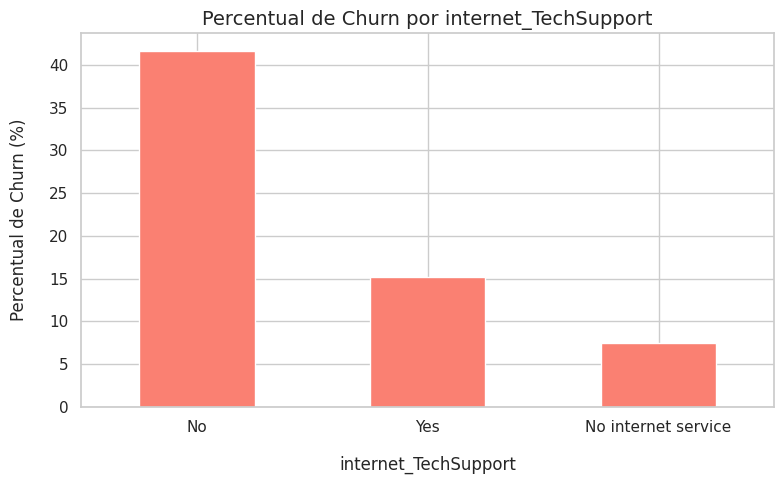

----------------------------------------

Analisando o serviço: 'internet_StreamingTV'
Tabela de Contagem:
Churn                   No  Yes
internet_StreamingTV           
No                    1868  942
No internet service   1413  113
Yes                   1893  814

Percentual de Churn (%):
Churn                    No    Yes
internet_StreamingTV              
No                    66.48  33.52
No internet service   92.60   7.40
Yes                   69.93  30.07


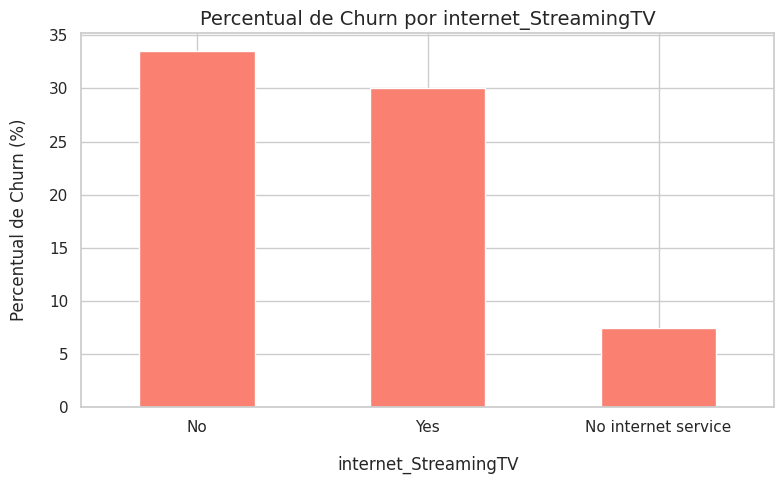

----------------------------------------

Analisando o serviço: 'internet_StreamingMovies'
Tabela de Contagem:
Churn                       No  Yes
internet_StreamingMovies           
No                        1847  938
No internet service       1413  113
Yes                       1914  818

Percentual de Churn (%):
Churn                        No    Yes
internet_StreamingMovies              
No                        66.32  33.68
No internet service       92.60   7.40
Yes                       70.06  29.94


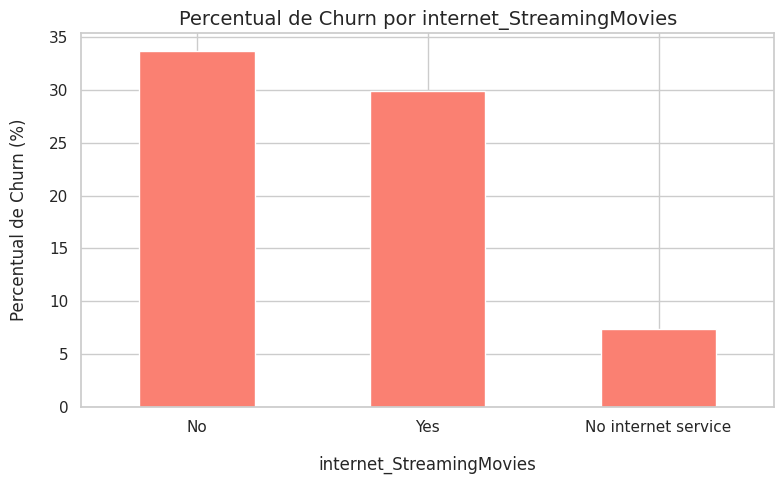

----------------------------------------

Analisando o serviço: 'account_PaperlessBilling'
Tabela de Contagem:
Churn                       No   Yes
account_PaperlessBilling            
No                        2403   469
Yes                       2771  1400

Percentual de Churn (%):
Churn                        No    Yes
account_PaperlessBilling              
No                        83.67  16.33
Yes                       66.43  33.57


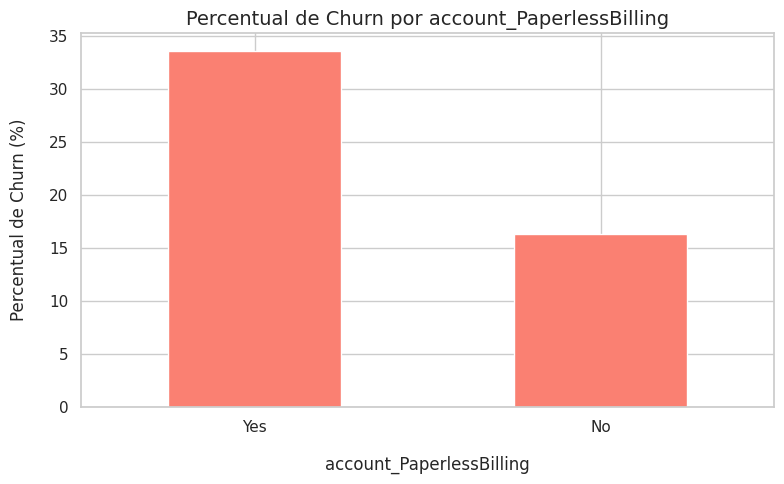

----------------------------------------

Resumo do Percentual de Churn por Categoria de Serviço:
  phone_PhoneService: {'No': 24.926686217008797, 'Yes': 26.70963684955196}
  phone_MultipleLines: {'No': 25.04424778761062, 'No phone service': 24.926686217008797, 'Yes': 28.6098956580276}
  internet_InternetService: {'DSL': 18.95910780669145, 'Fiber optic': 41.89276485788114, 'No': 7.404980340760157}
  internet_OnlineSecurity: {'No': 41.76672384219554, 'No internet service': 7.404980340760157, 'Yes': 14.611193660227837}
  internet_OnlineBackup: {'No': 39.92875647668394, 'No internet service': 7.404980340760157, 'Yes': 21.531494442157268}
  internet_DeviceProtection: {'No': 39.127625201938606, 'No internet service': 7.404980340760157, 'Yes': 22.50206440957886}
  internet_TechSupport: {'No': 41.63547365390153, 'No internet service': 7.404980340760157, 'Yes': 15.166340508806261}
  internet_StreamingTV: {'No': 33.52313167259787, 'No internet service': 7.404980340760157, 'Yes': 30.070188400443

In [98]:
# Gráficos de Barras Desistências vs. tipos de serviços
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas de serviços para análise
service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

churn_by_service = {}

print("Análise de Churn por Serviço:")
print("=" * 40)

for service in service_columns:
    print(f"\nAnalisando o serviço: '{service}'")


    contingency_table = pd.crosstab(df[service], df['Churn'])
    print("Tabela de Contagem:")
    print(contingency_table)

    contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    if 'Yes' in contingency_percent.columns:
        churn_by_service[service] = contingency_percent['Yes'].to_dict()
        print("\nPercentual de Churn (%):")
        print(contingency_percent[['No', 'Yes']].round(2))
    else:
        churn_by_service[service] = {cat: 0 for cat in contingency_table.index}
        print("\nPercentual de Churn (%):")
        print(contingency_table.apply(lambda x: x/x.sum(), axis=1).round(2) * 100)


    plt.figure(figsize=(8, 5))

    if 'Yes' in contingency_percent.columns:
        contingency_percent['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon')
        plt.ylabel('Percentual de Churn (%)', labelpad=15, fontsize=12)
        plt.title(f'Percentual de Churn por {service}', fontsize=14)
    else:
        contingency_percent['No'].sort_values(ascending=False).plot(kind='bar', color='lightblue')
        plt.ylabel('Percentual de Não Churn (%)', labelpad=15, fontsize=12)
        plt.title(f'Percentual de Não Churn por {service}', fontsize=14)

    plt.xlabel(service, labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()
    plt.show()

    print("-" * 40)


print("\nResumo do Percentual de Churn por Categoria de Serviço:")
for service, churn_rates in churn_by_service.items():
    print(f"  {service}: {churn_rates}")


highest_churn_rate = 0
service_most_related = None
category_most_related = None

for service, churn_rates in churn_by_service.items():
    for category, rate in churn_rates.items():
        if rate > highest_churn_rate:
            highest_churn_rate = rate
            service_most_related = service
            category_most_related = category

print(f"\nO serviço mais relacionado à desistência (com maior taxa de Churn em uma categoria) é:")
if service_most_related:
    print(f"  Serviço: '{service_most_related}'")
    print(f"  Categoria: '{category_most_related}'")
    print(f"  Taxa de Churn: {highest_churn_rate:.2f}%")
else:
    print("  Não foi possível determinar o serviço mais relacionado ao Churn.")

print("=" * 40)
print("Análise Concluída.")


Os gráficos sugerem que o serviço mais relacionado à desistência (com maior taxa de Churn em uma categoria) é:
  Serviço: 'internet_InternetService'

# Gráfico Heatmap para correlação entre os Serviços e as Desistências

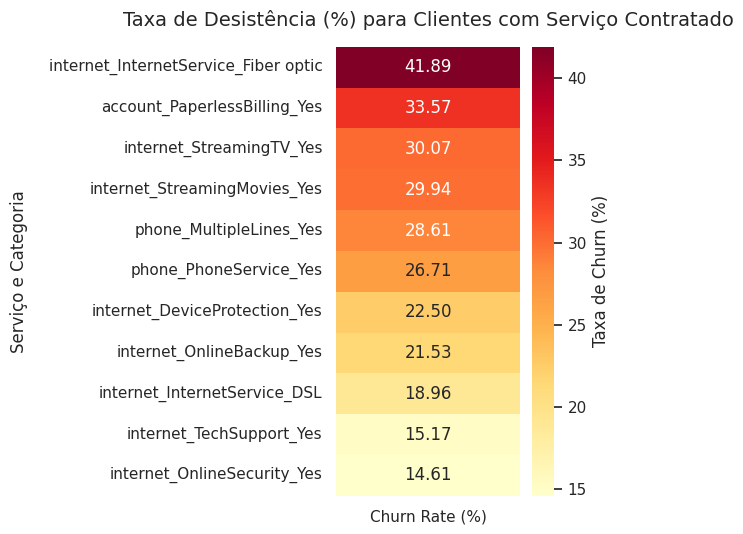

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas de serviços para análise
service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Dicionário para armazenar as taxas de churn para as categorias 'Yes' ou equivalentes
churn_rates_yes_dict = {}

for service in service_columns:
    # Cria a tabela de contingência entre o serviço e o Churn
    contingency_table = pd.crosstab(df[service], df['Churn'])

    # Calcula o percentual de Churn dentro de cada categoria do serviço
    contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    contingency_percent = contingency_percent.fillna(0) # Preenche NaNs com 0

    # Verifica se a coluna 'Yes' existe e se a categoria 'Yes' existe nesse serviço
    if 'Yes' in contingency_percent.columns:
        # Considera apenas as categorias que indicam adesão ao serviço
        # (geralmente 'Yes', mas 'Fiber optic' e 'DSL' para InternetService)
        if service == 'internet_InternetService':
            # Para InternetService, considere 'Fiber optic' e 'DSL'
            for category in ['Fiber optic', 'DSL']:
                if category in contingency_percent.index:
                     heatmap_key = f"{service}_{category}"
                     churn_rates_yes_dict[heatmap_key] = contingency_percent.loc[category, 'Yes']
        elif 'Yes' in contingency_percent.index:
             # Para outros serviços, considere a categoria 'Yes'
             heatmap_key = f"{service}_Yes"
             churn_rates_yes_dict[heatmap_key] = contingency_percent.loc['Yes', 'Yes']


# Converte o dicionário em um DataFrame para o heatmap
churn_heatmap_yes_data = pd.DataFrame.from_dict(churn_rates_yes_dict, orient='index', columns=['Churn Rate (%)'])

# Ordena os valores para melhor visualização no heatmap
churn_heatmap_yes_data = churn_heatmap_yes_data.sort_values(by='Churn Rate (%)', ascending=False)

# Cria o heatmap
plt.figure(figsize=(6, len(churn_heatmap_yes_data) * 0.5)) # Ajusta a altura com base no número de barras
sns.heatmap(churn_heatmap_yes_data, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Taxa de Churn (%)'})

plt.title("Taxa de Desistência (%) para Clientes com Serviço Contratado", fontsize=14, pad=15)
plt.ylabel("Serviço e Categoria", fontsize=12, labelpad=15)
plt.xlabel("") # Remove o rótulo do eixo x

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Os serviços listados têm diferentes impactos na retenção, e alguns deles apresentam churn bem elevado, indicando possíveis vulnerabilidades na experiência do cliente.

Principais observações
Fibra Óptica tem a maior taxa de churn (41.89%) – Isso sugere que, embora seja um serviço popular, pode estar associado a insatisfação dos clientes, seja por custo, qualidade ou atendimento. Vale a pena investigar o motivo dessa alta desistência.

Paperless Billing e Streaming (TV e Filmes) têm churn relativamente alto – Clientes que optam por faturamento digital e serviços de entretenimento mostram maior tendência de cancelamento. Isso pode indicar que esse perfil de usuário busca praticidade e pode ser mais sensível a mudanças na experiência ou nos preços.

Serviços como Online Security, Tech Support e Device Protection têm churn significativamente menor – Clientes que contratam esses serviços adicionais tendem a permanecer por mais tempo. Isso sugere que investir em proteção, suporte e segurança digital pode ser uma boa estratégia para fidelização.


O que fazer com esse insight?

Investigar o alto churn da Fibra Óptica:Analisar se há reclamações frequentes sobre preço, velocidade ou suporte técnico.

Revisar a experiência dos clientes que usam Paperless Billing e Streaming: Pode ser que esses grupos tenham expectativas específicas ou sejam mais propensos a testar concorrentes.

Expandir serviços de suporte e segurança: Como esses serviços já apresentam menor taxa de desistência, oferecer pacotes que incluem segurança digital e suporte técnico pode fortalecer a retenção.

# Gráfico de Barras Desistências por tipos de contratos(Mês, Ano, Dois anos)

Contagem de Clientes (Não Churn vs. Churn) por Tipo de Contrato:
Churn               No   Yes
account_Contract            
Month-to-month    2220  1655
One year          1307   166
Two year          1647    48

Percentual de Desistência (Churn) por Tipo de Contrato:
Churn                 No     Yes
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


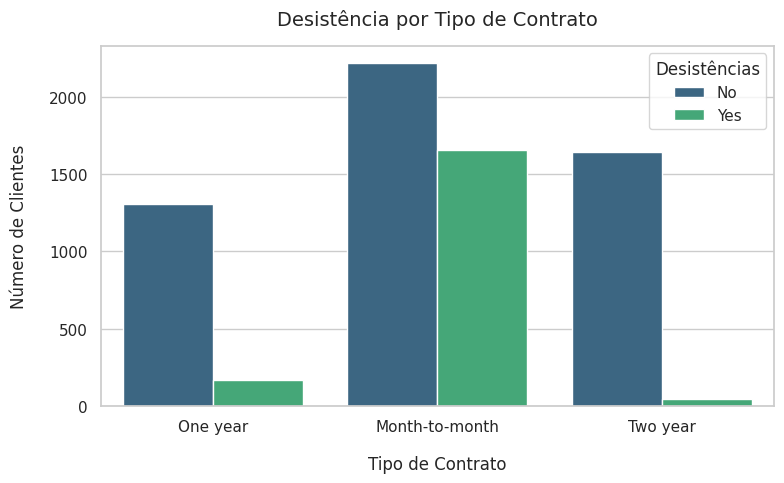

In [100]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'account_Contract' in df.columns and 'Churn' in df.columns:

    churn_por_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)


    churn_por_contrato_contagem = churn_por_contrato[['No', 'Yes']]
    print("Contagem de Clientes (Não Churn vs. Churn) por Tipo de Contrato:")
    print(churn_por_contrato_contagem)


    churn_por_contrato['Total'] = churn_por_contrato['No'] + churn_por_contrato['Yes']


    churn_por_contrato_percentual = churn_por_contrato.div(churn_por_contrato['Total'], axis=0) * 100


    churn_por_contrato_percentual_selecionado = churn_por_contrato_percentual[['No', 'Yes']]


    churn_por_contrato_percentual_formatado = churn_por_contrato_percentual_selecionado.map(lambda x: f'{x:.2f}%')

    print("\nPercentual de Desistência (Churn) por Tipo de Contrato:")
    print(churn_por_contrato_percentual_formatado)


    plt.figure(figsize=(8, 5))

    sns.countplot(data=df, x='account_Contract', hue='Churn', palette='viridis')

    plt.title("Desistência por Tipo de Contrato", pad=15, fontsize=14)
    plt.xlabel("Tipo de Contrato", labelpad=15, ha='center', fontsize=12)
    plt.ylabel("Número de Clientes", labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Desistências', loc='upper right')
    plt.tight_layout()
    plt.show()



# Gráficos comparativos dos meios de pagamento por tempo de contrato

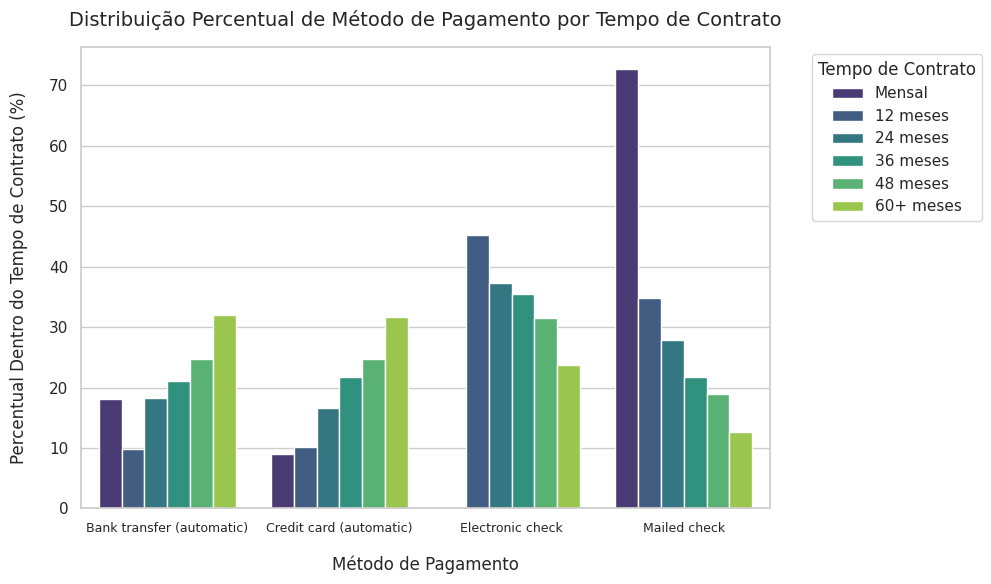

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')


df.dropna(subset=['customer_tenure'], inplace=True)


bins = [0, 1, 12, 24, 36, 48, 60, df['customer_tenure'].max()] # 8 limites -> 7 intervalos. Isso está correto.


bins = [0, 1, 12, 24, 36, 48, df['customer_tenure'].max()] # 7 limites -> 6 intervalos
labels = ["Mensal", "12 meses", "24 meses", "36 meses", "48 meses", "60+ meses"] # 6 rótulos

df['Tenure_Group'] = pd.cut(df['customer_tenure'], bins=bins, labels=labels, right=False, include_lowest=True)


if not df['Tenure_Group'].isnull().all():

    contingency_table = pd.crosstab(df['Tenure_Group'], df['account_PaymentMethod'])


    contingency_table_sum = contingency_table.sum(axis=1)
    contingency_percent = contingency_table.div(contingency_table_sum, axis=0) * 100


    contingency_percent = contingency_percent.fillna(0)


    plt.figure(figsize=(12, 6))


    plot_data = contingency_percent.reset_index().melt(id_vars="Tenure_Group")




    sns.barplot(data=plot_data,
                x="account_PaymentMethod",
                y="value",
                hue="Tenure_Group",        # Cor/Grupo pela segmentação de Tempo de Contrato
                palette="viridis")


    plt.title("Distribuição Percentual de Método de Pagamento por Tempo de Contrato", fontsize=14, pad=15)
    plt.xlabel("Método de Pagamento", fontsize=12, labelpad=15)
    plt.ylabel("Percentual Dentro do Tempo de Contrato (%)", fontsize=12, labelpad=15) # Adiciona '%'


    plt.xticks(rotation=0, fontsize=9, ha="center")


    plt.legend(title="Tempo de Contrato", bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()

else:
    print("Erro: A coluna 'Tenure_Group' não foi criada corretamente ou está vazia. Verifique os dados de 'customer_tenure' e a definição dos bins.")


Este gráfico mostra como as preferências de pagamento variam conforme o tipo de contrato. Clientes com contratos mensais preferem pagamentos tradicionais, como cheque enviado, possivelmente por quererem mais controle sobre suas finanças ou por não estarem tão acostumados com transações digitais. Nos contratos de 12 e 24 meses, o cheque eletrônico se torna mais comum, o que indica que clientes de médio prazo podem preferir alternativas digitais, mas ainda sem total automação. Já em contratos mais longos, como 48 meses, há uma maior presença da transferência bancária automática, sugerindo que clientes comprometidos por mais tempo buscam praticidade. Para contratos acima de 60 meses, o cartão de crédito automático é o método preferido, mostrando que clientes de longa permanência valorizam a conveniência.

 O que esses insights indicam?  

  Clientes de contratos mensais evitam métodos automáticos, talvez por receio de cancelamento ou maior necessidade de controle financeiro.

  O uso de pagamentos automáticos cresce conforme o contrato se estende, refletindo maior confiança e comprometimento dos clientes.  
  
  Clientes de médio prazo ainda optam por transações eletrônicas, mas sem total automação, o que pode indicar cautela na fidelização.  

Com esses dados, a empresa pode ajustar estratégias de pagamento e retenção, garantindo que as opções oferecidas atendam melhor às necessidades de cada grupo de clientes. Se quiser aprofundar alguma análise, posso ajudar.

# Impacto dos serviços na retenção de Clientes

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df.dropna(subset=['Churn'], inplace=True)


service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

print("Análise de Retenção (Churn Rate) por Tipo de Serviço:")
print("="*70)

results = {}

for col in service_columns:
    print(f"\nAnalisando '{col}':")


    if col == 'internet_InternetService':

        ct = pd.crosstab(df[col], df['Churn'])


        ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
        ct_percent = ct_percent.fillna(0)

        print("Percentual de Churn por Categoria de Internet Service:")

        print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

        results[col] = ct_percent['Yes'].to_dict()
        print("-" * 30)

    else:

        if df[col].nunique() > 1:

            ct = pd.crosstab(df[col], df['Churn'])


            if 'Total' in ct.columns:
                 ct = ct.drop(columns=['Total'], errors='ignore')

            ct_sum = ct.sum(axis=1)

            ct_percent = ct.div(ct_sum, axis=0) * 100
            ct_percent = ct_percent.fillna(0)

            print("Percentual de Churn por status de serviço ('Sim' vs 'Não'):")

            if 'Yes' in ct_percent.columns:
                 print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

                 results[col] = ct_percent['Yes'].to_dict()
            else:
                 print("Nenhum cliente com Churn 'Yes' para esta coluna.")

                 results[col] = {val: 0.0 for val in df[col].unique()}


            print("-" * 30)
        else:
            print(f"Coluna '{col}' tem apenas um valor único. Não é útil para análise de retenção comparativa.")
            print("-" * 30)

print("\nResumo da Análise de Churn por Serviço:")
print("="*70)


services_with_binary_comparison = {}

for col, churn_rates in results.items():
    if col == 'internet_InternetService':

        print(f"'{col}':")

        if churn_rates:
            min_churn_cat = min(churn_rates, key=churn_rates.get)
            max_churn_cat = max(churn_rates, key=churn_rates.get)
            print(f"  Maior Retenção (Menor Churn): Categoria '{min_churn_cat}' ({churn_rates[min_churn_cat]:.2f}%)")
            print(f"  Menor Retenção (Maior Churn): Categoria '{max_churn_cat}' ({churn_rates[max_churn_cat]:.2f}%)")
        else:
             print("  Dados insuficientes para esta análise.")

    elif 'Yes' in churn_rates and ('No' in churn_rates or 'No phone service' in churn_rates or 'No internet service' in churn_rates):

        churn_yes = churn_rates.get('Yes', np.nan)

        churn_no = np.nan
        if 'No' in churn_rates:
             churn_no = churn_rates['No']
        elif 'No phone service' in churn_rates:
             churn_no = churn_rates['No phone service']
        elif 'No internet service' in churn_rates:
             churn_no = churn_rates['No internet service']


        print(f"'{col}':")
        if not np.isnan(churn_yes) and not np.isnan(churn_no):
            print(f"  Churn (Com o Serviço): {churn_yes:.2f}%")
            print(f"  Churn (Sem o Serviço): {churn_no:.2f}%")


            if churn_yes < churn_no:
                print("  Impacto na Retenção: Positivo (Taxa de Churn menor para quem tem o serviço)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Positive'}
            elif churn_yes > churn_no:
                print("  Impacto na Retenção: Negativo (Taxa de Churn maior para quem tem o serviço)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Negative'}
            else:
                print("  Impacto na Retenção: Neutro (Taxas de Churn similares)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Neutral'}
        else:
            print("  Dados insuficientes para comparação binária (faltam dados para 'Sim' ou 'Não').")

    else:
         print(f"'{col}': Não é um serviço binário típico ou faltam dados para comparação.")

         if churn_rates:
             print("  Taxas de Churn disponíveis:", churn_rates)
         else:
             print("  Nenhuma taxa de Churn calculada.")


print("\nConclusão Baseada no Impacto na Retenção (comparando Churn 'Com' vs 'Sem' o serviço):")
print("="*100)


positive_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Positive'}
negative_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Negative'}
neutral_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Neutral'}


print("Serviços com *MAIOR* Retenção (Taxa de Churn *menor* para quem tem o serviço):")
if positive_impact_services:

    best_retention_service = min(positive_impact_services, key=lambda k: positive_impact_services[k]['churn_yes'])
    rates = positive_impact_services[best_retention_service]
    print(f"- **{best_retention_service}**: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
else:
    print("- Nenhum serviço binário mostrou claramente que TER o serviço resulta em menor Churn.")


print("\nServiços que *NÃO* são muito Significativos para Reter Clientes (Taxa de Churn *maior* ou similar para quem tem o serviço):")
if negative_impact_services:

     worst_retention_service = max(negative_impact_services, key=lambda k: negative_impact_services[k]['churn_yes'])
     rates = negative_impact_services[worst_retention_service]
     print(f"- **{worst_retention_service}**: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
elif neutral_impact_services:
     print("- Nenhum serviço binário mostrou claramente um impacto negativo. Os serviços neutros são:")
     for service, rates in neutral_impact_services.items():
          print(f"  - {service}: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
else:
    print("- Todos os serviços binários parecem ter um impacto neutro ou positivo.")


print("\nConsideração especial: Internet Service")
if 'internet_InternetService' in results:
    churn_internet = results['internet_InternetService']
    print(f"- Para '{'internet_InternetService'}':")
    if churn_internet:
        min_churn_cat = min(churn_internet, key=churn_internet.get)
        max_churn_cat = max(churn_internet, key=churn_internet.get)
        print(f"  - Clientes sem serviço de internet ('{min_churn_cat}') têm a *menor* taxa de Churn ({churn_internet[min_churn_cat]:.2f}%).")
        print(f"  - Clientes com Fibra Óptica ('{max_churn_cat}') têm a *maior* taxa de Churn ({churn_internet[max_churn_cat]:.2f}%).")
    else:
         print("  - Dados insuficientes para analisar Internet Service.")

print("\nNota: Esta análise compara a taxa de Churn entre clientes que 'têm' versus 'não têm' um serviço específico. Serviços com menor Churn para quem os possui *sugerem* maior retenção, mas isso pode ser influenciado por outros fatores (ex: clientes de longa data tendem a ter mais serviços e também menor churn geral). Uma análise mais profunda (como modelos de Machine Learning) seria necessária para determinar a *causalidade* ou o impacto isolado de cada serviço.")




Análise de Retenção (Churn Rate) por Tipo de Serviço:

Analisando 'phone_PhoneService':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                  Yes
phone_PhoneService        
No                  24.93%
Yes                 26.71%
------------------------------

Analisando 'phone_MultipleLines':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                   Yes
phone_MultipleLines        
No                   25.04%
No phone service     24.93%
Yes                  28.61%
------------------------------

Analisando 'internet_InternetService':
Percentual de Churn por Categoria de Internet Service:
Churn                        Yes
internet_InternetService        
DSL                       18.96%
Fiber optic               41.89%
No                         7.40%
------------------------------

Analisando 'internet_OnlineSecurity':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                       Yes
internet_OnlineSecurity  

# Gráfico de Barras Análise de Retenção (Churn Rate) por Tipo de Serviço:

Análise de Retenção (Churn Rate) por Tipo de Serviço:

Analisando 'phone_PhoneService':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                  Yes
phone_PhoneService        
No                  24.93%
Yes                 26.71%
------------------------------

Analisando 'phone_MultipleLines':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                   Yes
phone_MultipleLines        
No                   25.04%
No phone service     24.93%
Yes                  28.61%
------------------------------

Analisando 'internet_InternetService':
Percentual de Churn por Categoria de Internet Service:
Churn                        Yes
internet_InternetService        
DSL                       18.96%
Fiber optic               41.89%
No                         7.40%
------------------------------

Analisando 'internet_OnlineSecurity':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                       Yes
internet_OnlineSecurity  

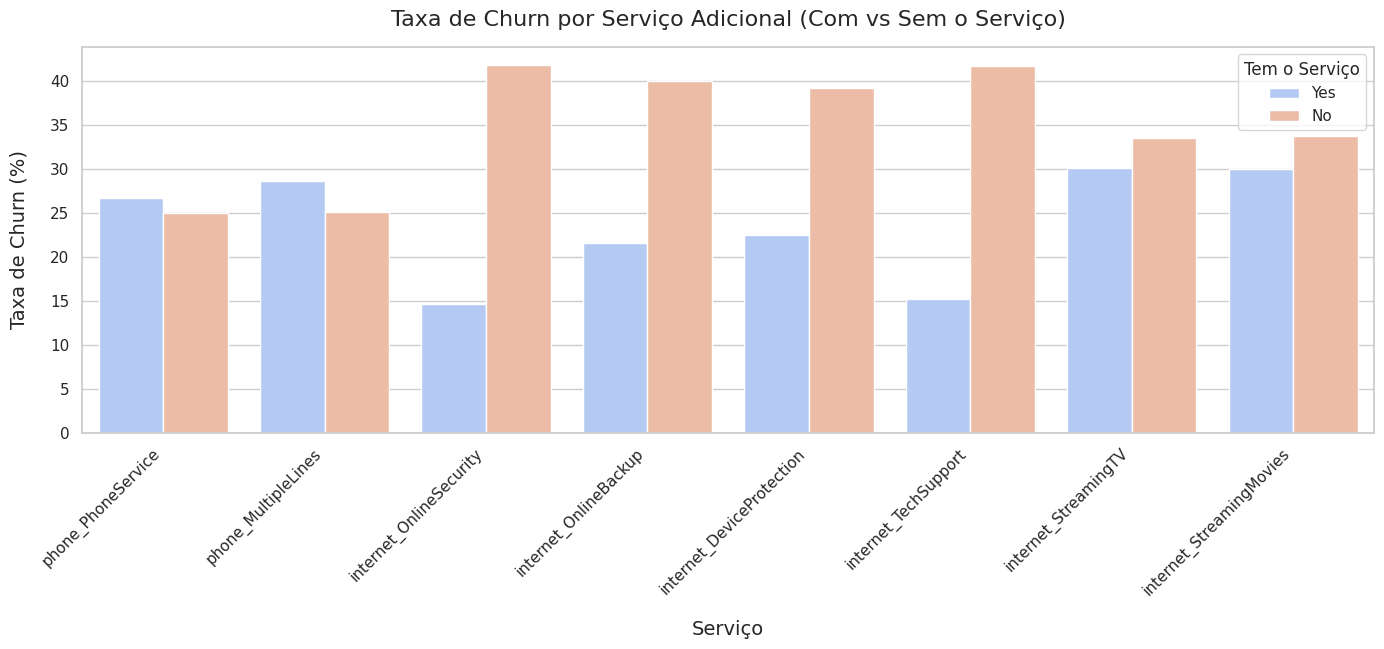

<ipython-input-103-277880706>:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=internet_plot_df, x='Internet_Type', y='Churn_Rate', palette='viridis')


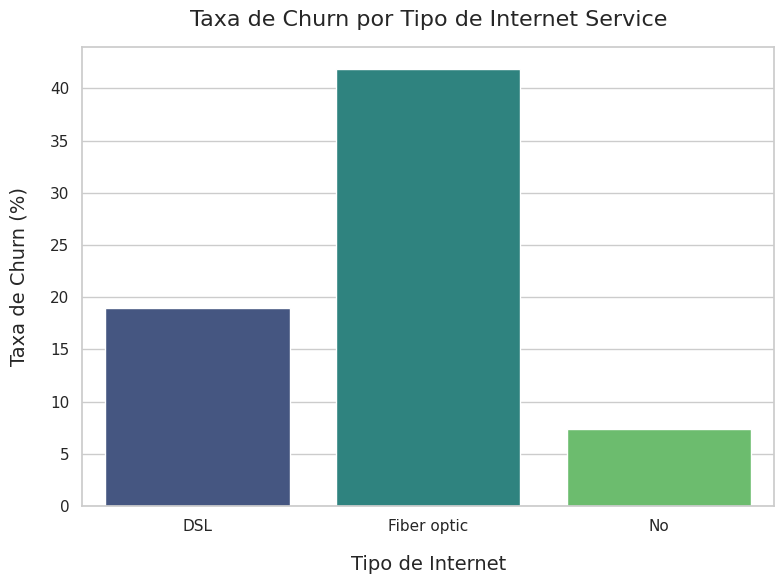

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df.dropna(subset=['Churn'], inplace=True)


service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

print("Análise de Retenção (Churn Rate) por Tipo de Serviço:")
print("="*70)

results = {}

for col in service_columns:
    print(f"\nAnalisando '{col}':")


    if col == 'internet_InternetService':
        # Calcula a tabela de contingência para InternetService e Churn
        ct = pd.crosstab(df[col], df['Churn'])

        # Calcula o percentual de Churn dentro de cada categoria de InternetService
        ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
        ct_percent = ct_percent.fillna(0) # Preenche NaNs com 0

        print("Percentual de Churn por Categoria de Internet Service:")
        # Formata para exibir como percentual
        print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

        # Armazena os resultados. Aqui, a retenção/churn é por tipo específico (DSL, Fiber optic, No)
        # Clientes sem InternetService têm Churn muito baixo, sugerindo alta retenção para esse grupo.
        # Clientes com Fiber optic têm Churn muito alto, sugerindo baixa retenção.
        results[col] = ct_percent['Yes'].to_dict() # Armazena os percentuais de Churn 'Yes'
        print("-" * 30) # Separador

    else:
        # Para colunas binárias ('Yes'/'No', ou similar)
        # Certifica-se de que há clientes com e sem o serviço (evitar erros em crosstab)
        if df[col].nunique() > 1:
            # Calcula a tabela de contingência
            ct = pd.crosstab(df[col], df['Churn'])

            # Calcula o percentual de Churn DENTRO de cada categoria ('Yes' e 'No')
            # Ignora a coluna 'Total' se ela existir de cálculos anteriores
            if 'Total' in ct.columns:
                 ct = ct.drop(columns=['Total'], errors='ignore')

            ct_sum = ct.sum(axis=1)
            # Evita divisão por zero caso uma categoria não tenha clientes
            ct_percent = ct.div(ct_sum, axis=0) * 100
            ct_percent = ct_percent.fillna(0) # Preenche NaNs com 0

            print("Percentual de Churn por status de serviço ('Sim' vs 'Não'):")
            # Exibe o percentual de Churn ('Yes') para cada status ('No', 'Yes', etc.)
            if 'Yes' in ct_percent.columns:
                 print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))
                 # Armazena os resultados para fácil comparação posterior
                 results[col] = ct_percent['Yes'].to_dict()
            else:
                 print("Nenhum cliente com Churn 'Yes' para esta coluna.")
                 # Se não houver 'Yes' Churn na tabela, cria uma entrada com 0%
                 results[col] = {val: 0.0 for val in df[col].unique()}


            print("-" * 30) # Separador
        else:
            print(f"Coluna '{col}' tem apenas um valor único. Não é útil para análise de retenção comparativa.")
            print("-" * 30)

print("\nResumo da Análise de Churn por Serviço:")
print("="*70)



services_with_binary_comparison = {}

for col, churn_rates in results.items():
    if col == 'internet_InternetService':

        print(f"'{col}':")
        # Encontrar a categoria com menor e maior churn para InternetService
        if churn_rates:
            min_churn_cat = min(churn_rates, key=churn_rates.get)
            max_churn_cat = max(churn_rates, key=churn_rates.get)
            print(f"  Maior Retenção (Menor Churn): Categoria '{min_churn_cat}' ({churn_rates[min_churn_cat]:.2f}%)")
            print(f"  Menor Retenção (Maior Churn): Categoria '{max_churn_cat}' ({churn_rates[max_churn_cat]:.2f}%)")
        else:
             print("  Dados insuficientes para esta análise.")

    elif 'Yes' in churn_rates and ('No' in churn_rates or 'No phone service' in churn_rates or 'No internet service' in churn_rates):
        # Para serviços binários (Sim/Não)
        churn_yes = churn_rates.get('Yes', np.nan) # Pega Churn Rate para quem tem
        # Tenta encontrar o churn rate para quem NÃO tem
        churn_no = np.nan
        if 'No' in churn_rates:
             churn_no = churn_rates['No']
        elif 'No phone service' in churn_rates:
             churn_no = churn_rates['No phone service']
        elif 'No internet service' in churn_rates:
             churn_no = churn_rates['No internet service']


        print(f"'{col}':")
        if not np.isnan(churn_yes) and not np.isnan(churn_no):
            print(f"  Churn (Com o Serviço): {churn_yes:.2f}%")
            print(f"  Churn (Sem o Serviço): {churn_no:.2f}%")

            # Comparação: Se Churn (Com) < Churn (Sem), o serviço *ajuda* na retenção.
            # Se Churn (Com) > Churn (Sem), o serviço *não ajuda* na retenção, ou até piora.
            if churn_yes < churn_no:
                print("  Impacto na Retenção: Positivo (Taxa de Churn menor para quem tem o serviço)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Positive'}
            elif churn_yes > churn_no:
                print("  Impacto na Retenção: Negativo (Taxa de Churn maior para quem tem o serviço)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Negative'}
            else:
                print("  Impacto na Retenção: Neutro (Taxas de Churn similares)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Neutral'}
        else:
            print("  Dados insuficientes para comparação binária (faltam dados para 'Sim' ou 'Não').")

    else:
         print(f"'{col}': Não é um serviço binário típico ou faltam dados para comparação.")

         if churn_rates:
             print("  Taxas de Churn disponíveis:", churn_rates)
         else:
             print("  Nenhuma taxa de Churn calculada.")


print("\nConclusão Baseada no Impacto na Retenção (comparando Churn 'Com' vs 'Sem' o serviço):")
print("="*100)

# Iterar sobre os resultados da comparação binária para identificar os extremos
positive_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Positive'}
negative_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Negative'}
neutral_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Neutral'}


print("Serviços com *MAIOR* Retenção (Taxa de Churn *menor* para quem tem o serviço):")
if positive_impact_services:
    # Encontrar o serviço com a MAIOR diferença percentual positiva (churn_no - churn_yes)
    # ou simplesmente o serviço com a menor taxa de Churn para quem TEM o serviço
    # Vamos focar no menor Churn para quem TEM o serviço como indicador de "maior retenção"
    best_retention_service = min(positive_impact_services, key=lambda k: positive_impact_services[k]['churn_yes'])
    rates = positive_impact_services[best_retention_service]
    print(f"- **{best_retention_service}**: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
else:
    print("- Nenhum serviço binário mostrou claramente que TER o serviço resulta em menor Churn.")


print("\nServiços que *NÃO* são muito Significativos para Reter Clientes (Taxa de Churn *maior* ou similar para quem tem o serviço):")
if negative_impact_services:
     # Encontrar o serviço com a MAIOR taxa de Churn para quem TEM o serviço (ou a maior diferença churn_yes - churn_no)
     # Vamos focar no maior Churn para quem TEM o serviço como indicador de "menos significativo" ou "pior retenção"
     worst_retention_service = max(negative_impact_services, key=lambda k: negative_impact_services[k]['churn_yes'])
     rates = negative_impact_services[worst_retention_service]
     print(f"- **{worst_retention_service}**: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
elif neutral_impact_services:
     print("- Nenhum serviço binário mostrou claramente um impacto negativo. Os serviços neutros são:")
     for service, rates in neutral_impact_services.items():
          print(f"  - {service}: Churn para quem TEM: {rates['churn_yes']:.2f}%, Churn para quem NÃO TEM: {rates['churn_no']:.2f}%")
else:
    print("- Todos os serviços binários parecem ter um impacto neutro ou positivo.")


print("\nConsideração especial: Internet Service")
if 'internet_InternetService' in results:
    churn_internet = results['internet_InternetService']
    print(f"- Para '{'internet_InternetService'}':")
    if churn_internet:
        min_churn_cat = min(churn_internet, key=churn_internet.get)
        max_churn_cat = max(churn_internet, key=churn_internet.get)
        print(f"  - Clientes sem serviço de internet ('{min_churn_cat}') têm a *menor* taxa de Churn ({churn_internet[min_churn_cat]:.2f}%).")
        print(f"  - Clientes com Fibra Óptica ('{max_churn_cat}') têm a *maior* taxa de Churn ({churn_internet[max_churn_cat]:.2f}%).")
    else:
         print("  - Dados insuficientes para analisar Internet Service.")

print("\nNota: Esta análise compara a taxa de Churn entre clientes que 'têm' versus 'não têm' um serviço específico. Serviços com menor Churn para quem os possui *sugerem* maior retenção, mas isso pode ser influenciado por outros fatores (ex: clientes de longa data tendem a ter mais serviços e também menor churn geral). Uma análise mais profunda (como modelos de Machine Learning) seria necessária para determinar a *causalidade* ou o impacto isolado de cada serviço.")



if services_with_binary_comparison:

        plot_data = []
        for service, rates in services_with_binary_comparison.items():
            plot_data.append({'Service': service, 'Has_Service': 'Yes', 'Churn_Rate': rates['churn_yes']})
            plot_data.append({'Service': service, 'Has_Service': 'No', 'Churn_Rate': rates['churn_no']})
        plot_df = pd.DataFrame(plot_data)

        plt.figure(figsize=(14, 7))
        sns.barplot(data=plot_df, x='Service', y='Churn_Rate', hue='Has_Service', palette='coolwarm')

        plt.title('Taxa de Churn por Serviço Adicional (Com vs Sem o Serviço)', fontsize=16, pad=15)
        plt.xlabel('Serviço', fontsize=14, labelpad=15)
        plt.ylabel('Taxa de Churn (%)', fontsize=14, labelpad=15)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Tem o Serviço')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
else:
        print("Nenhum serviço binário encontrado para plotar.")

    # Gráfico separado para InternetService
if 'internet_InternetService' in results and results['internet_InternetService']:
         internet_churn_rates = results['internet_InternetService']
         internet_plot_df = pd.DataFrame(list(internet_churn_rates.items()), columns=['Internet_Type', 'Churn_Rate'])

         plt.figure(figsize=(8, 6))
         sns.barplot(data=internet_plot_df, x='Internet_Type', y='Churn_Rate', palette='viridis')

         plt.title('Taxa de Churn por Tipo de Internet Service', fontsize=16, pad=15)
         plt.xlabel('Tipo de Internet', fontsize=14, labelpad=15)
         plt.ylabel('Taxa de Churn (%)', fontsize=14, labelpad=15)
         plt.tight_layout()
         plt.show()

In [104]:
import pandas as pd

# Certifique-se de que seu DataFrame 'df' está carregado e limpo
# Vamos garantir que a coluna 'internet_InternetService' exista
if 'internet_InternetService' in df.columns:

    print("Distribuição de Clientes por Tipo de Internet Service:")
    print("="*60)

    # Conta o número de clientes em cada categoria de Internet Service
    internet_service_counts = df['internet_InternetService'].value_counts()
    print("\nContagem de Clientes:")
    print(internet_service_counts)

    # Calcula o total de clientes com algum tipo de serviço de internet ou sem serviço
    total_customers = internet_service_counts.sum()
    print(f"\nTotal de Clientes na base analisada: {total_customers}")

    # Calcula o percentual de cada categoria em relação ao total
    internet_service_percent = (internet_service_counts / total_customers) * 100

    print("\nPercentual de Clientes:")
    # Formata para exibir como percentual com duas casas decimais
    print(internet_service_percent.map(lambda x: f'{x:.2f}%'))

    print("="*60)

    # Extraindo os percentuais específicos solicitados
    fiber_optic_percent = internet_service_percent.get('Fiber optic', 0.0) # Use .get para evitar erro se a categoria não existir
    dsl_percent = internet_service_percent.get('DSL', 0.0)
    no_internet_percent = internet_service_percent.get('No', 0.0) # Também é interessante saber quem não tem

    print(f"\nResumo dos Percentuais:")
    print(f"- Clientes com Fibra Óptica: {fiber_optic_percent:.2f}%")
    print(f"- Clientes com DSL: {dsl_percent:.2f}%")
    print(f"- Clientes SEM Serviço de Internet: {no_internet_percent:.2f}%")


else:
    print("Erro: A coluna 'internet_InternetService' não foi encontrada no DataFrame.")

Distribuição de Clientes por Tipo de Internet Service:

Contagem de Clientes:
internet_InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Total de Clientes na base analisada: 7043

Percentual de Clientes:
internet_InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: count, dtype: object

Resumo dos Percentuais:
- Clientes com Fibra Óptica: 43.96%
- Clientes com DSL: 34.37%
- Clientes SEM Serviço de Internet: 21.67%


# Gráfico de Barras para visualizar a Taxa de Desistência (Churn Rate) por Tipo de Internet Service

Taxa de Churn (%) por Tipo de Internet Service:
internet_InternetService
DSL            18.96%
Fiber optic    41.89%
No              7.40%
dtype: object


<ipython-input-105-2582321836>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Internet_Type', y='Churn_Rate', palette='viridis') # Use uma paleta de cores adequada


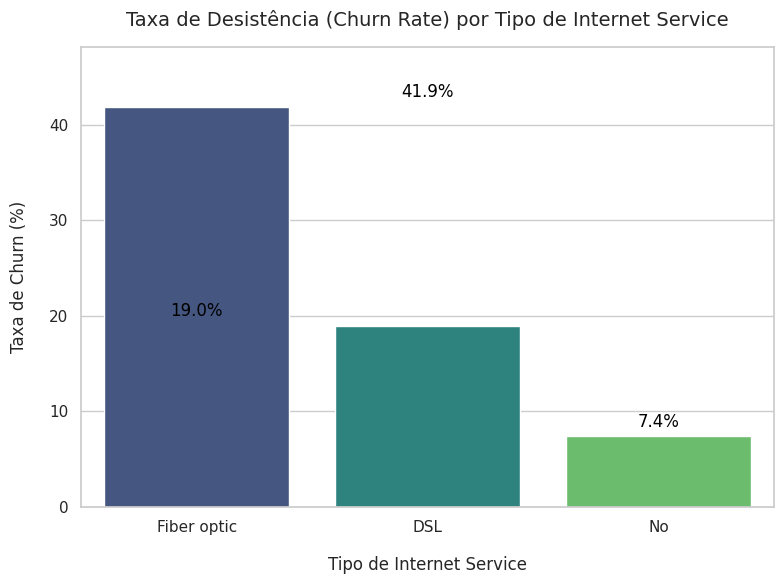

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df.dropna(subset=['Churn', 'internet_InternetService'], inplace=True)

# --- Cálculo da Taxa de Churn por Tipo de Internet Service ---

# Calcula a tabela de contingência para InternetService e Churn
# O resultado é um DataFrame com 'internet_InternetService' como índice e colunas 'No', 'Yes' (ou outros valores de Churn)
ct = pd.crosstab(df['internet_InternetService'], df['Churn'])

# Verifica se a coluna 'Yes' (para Churn) existe
if 'Yes' in ct.columns:
    # Calcula o total de clientes em cada categoria de Internet Service
    ct_sum = ct.sum(axis=1)

    # Calcula o percentual de Churn ('Yes') dentro de cada categoria de Internet Service
    # Divide a coluna 'Yes' (contagem de Churn) pelo total de clientes na linha
    # Multiplica por 100 para obter o percentual
    # Use .reindex para garantir que todas as categorias estejam presentes mesmo se não houver Churn 'Yes'
    churn_rate_by_internet = (ct['Yes'] / ct_sum) * 100

    # Trata casos onde a soma é zero (evita NaNs ou Infinitos)
    churn_rate_by_internet = churn_rate_by_internet.fillna(0)

    print("Taxa de Churn (%) por Tipo de Internet Service:")
    print(churn_rate_by_internet.map(lambda x: f'{x:.2f}%'))
    print("="*60)

    # --- Preparação dos Dados para o Gráfico ---
    # Converte a Series resultante em um DataFrame para fácil plotagem com seaborn
    # A Series tem o tipo de internet como índice e a taxa de churn como valor
    plot_data = churn_rate_by_internet.reset_index()
    plot_data.columns = ['Internet_Type', 'Churn_Rate']

    # Opcional: Ordenar as barras pela taxa de churn para facilitar a visualização
    plot_data = plot_data.sort_values('Churn_Rate', ascending=False)

    # --- Criação do Gráfico de Barras ---
    plt.figure(figsize=(8, 6))

    # sns.barplot cria o gráfico de barras
    sns.barplot(data=plot_data, x='Internet_Type', y='Churn_Rate', palette='viridis') # Use uma paleta de cores adequada

    # Adiciona os valores percentuais nas barras (opcional, mas útil)
    for index, row in plot_data.iterrows():
        plt.text(index, row['Churn_Rate'] + 1, f'{row["Churn_Rate"]:.1f}%', color='black', ha="center") # +1 para posicionar acima da barra

    # Adiciona título e rótulos aos eixos
    plt.title('Taxa de Desistência (Churn Rate) por Tipo de Internet Service', fontsize=14, pad=15)
    plt.xlabel('Tipo de Internet Service', fontsize=12, labelpad=15)
    plt.ylabel('Taxa de Churn (%)', fontsize=12, labelpad=15)

    # Ajusta os limites do eixo Y para ter um pouco de espaço acima da maior barra
    plt.ylim(0, plot_data['Churn_Rate'].max() * 1.15)

    plt.tight_layout() # Ajusta o layout para evitar cortes
    plt.show()

else:
    print("A coluna 'Yes' (representando Churn) não foi encontrada na tabela de contingência. Verifique os valores únicos na coluna 'Churn'.")



Barra Mais Baixa: O tipo de serviço de internet com a barra mais baixa tem a menor taxa de Churn. Esse é o grupo de clientes que a companhia está retendo melhor. Investir aqui pode significar focar em estratégias para manter esses clientes satisfeitos e engajados, talvez oferecendo benefícios por lealdade ou expandindo a cobertura/qualidade para atrair mais clientes com esse perfil.
Barra Mais Alta: O tipo de serviço de internet com a barra mais alta tem a maior taxa de Churn. Esse é o grupo de clientes que está desistindo com mais frequência. Investir aqui significa focar em identificar as causas desse alto Churn . Pergunte-se:
Por que clientes com Fibra Óptica desistem tanto (se essa for a barra mais alta)? É problema de qualidade de conexão? Preço? Atendimento ao cliente? Concorrência?
Um investimento para reduzir o Churn neste grupo de alta evasão pode ser mais impactante no número absoluto de clientes perdidos, mas requer resolver os problemas subjacentes.
Barra Intermediária: O tipo de serviço entre os extremos. Você pode ser um bom candidato para investimentos que visam tanto a retenção quanto a aquisição.
Conclusão para Investimento:

A decisão de onde investir mais depende do objetivo:

Se o objetivo é capitalizar sobre o que já funciona bem e solidificar a base de clientes leais, invista no serviço com a menor taxa de Churn.
Se o objetivo é resolver um problema sério de perda de clientes em um segmento específico, invista no serviço com a maior taxa de Churn, mas com foco na resolução das causas.
Considerando a análise anterior que mostrou que clientes SEM internet têm Churn baixíssimo e clientes com Fibra Óptica têm Churn altíssimo, a visualização confirmará isso. Investir em Fibra Óptica para diminuir a desistência exigiria uma análise profunda das razões do Churn nesse segmento e ações corretivas (melhorar serviço, suporte, oferta, etc.), enquanto investir em DSL ou em clientes SEM internet (talvez oferecendo pacotes básicos de baixo Churn) seria mais sobre manter a estabilidade onde ela já existe.
Este gráfico de barras da taxa de Churn por tipo de internet fornecerá a visualização clara para embasar essa discussão sobre onde direcionar o investimento para impactar a retenção.